# Code for the data anlaysis of the paper: "Machine Learning Models Predict the Emergence of Depression in Argentinean College Students during Periods of COVID-19 Quarantine":

# Part 1:  Binary classification task

"Machine Learning Models Predict the Emergence of Depression in Argentinean College Students during Periods of COVID-19 Quarantine"

Lorena Cecilia López Steinmetz1,2*, Margarita Sison3†, Rustam Zhumagambetov4†, Juan Carlos Godoy2, Stefan Haufe1,3,4,5*

Affiliations:

1 Technische Universität Berlin, Faculty IV Electrical Engineering and Computer Science, Institute of Software Engineering and Theoretical Computer Science, Chair of Uncertainty, Inverse Modeling and Machine Learning, Berlin, Germany

2 Universidad Nacional de Córdoba (UNC), Consejo Nacional de Investigaciones Científicas y Técnicas (CONICET), Facultad de Psicología, Instituto de Investigaciones Psicológicas (IIPsi), Córdoba, Argentina

3 Charité – Universitätsmedizin Berlin, Berlin Center for Advanced Neuroimaging (BCAN), Berlin, Germany

4 Physikalisch-Technische Bundesanstalt Braunschweig und Berlin, Mathematical Modelling and Data Analysis Department, Working Group 8.44 Machine Learning and Uncertainty, Berlin, Germany 

5 Charité – Universitätsmedizin Berlin, Institute for Medical Informatics, Berlin, Germany

† These authors contributed equally to this work



**Part 1:  Binary classification task**

This Jupyter notebook outlines the data analysis process used in our paper López Steinemtz et al. "Machine Learning Models Predict the Emergence of Depression in Argentinean College Students during Periods of COVID-19 Quarantine" to classify college students as having or not having depression, utilizing linear logistic regression, random forest classifier, and support vector machine (SVM) models. We use scores from the Beck Depression Inventory (binarized according to the standarized cut-off score for depression in non-clinical populations) as the outcome variable. We include psychological inventory scores (depression at T1 and anxiety-trait at T1), basic clinical information (mental disorder history, suicidal behavior history), quarantine sub-periods (first, second, third), and demographics (sex, age) as features.

We evaluate the models' performance using various metrics, including, area under the precision-recall curve (AUPRC), area under the receiver operating characteristic curve (AUROC), balanced accuracy score, Brier loss score, and F1 score, and compare them to three dummy/baseline classifiers (uniform random baseline, most frequent baseline, and stratified random baseline).

We evaluate multivariate models and univariate models. 

The dataset analyzed here is from a study published in the following paper:

- López Steinmetz LC, Godoy JC, Fong SB. A longitudinal study on depression and anxiety in college students during the first 106-days of the lengthy Argentinean quarantine for the COVID-19 pandemic.  Ment Health. 2023 Dec;32(6):1030-1039. doi: https://doi.org/10.1080/09638237.2021.1952952. Epub 2021 Jul 24. PMID: 34304678.

The data collection procedure and sample description are available in that published paper (López Steinmetz et al., 2021).

The complete dataset is available in the Open Science Framework (OSF) repository: https://doi.org/10.17605/OSF.IO/2V84N.

In [244]:
# Load 'dataset.xlsx' file 
import pandas as pd

# data = pd.read_excel("YOUR_PATH/dataset.xlsx", sheet_name=0, header=0)

## Data preprocessing

In [245]:
data

,participant,ADEPRESSION,BDEPRESSION,AANXIETY,BANXIETY,quarantinesubperiod,sex,age,mentdishist,suic
0,1,13,1,33,21,quar first,woman,22,no,no
1,2,16,11,21,14,quar first,woman,24,no,yes
2,3,5,11,20,23,quar first,woman,30,no,yes
3,4,28,24,41,41,quar first,woman,22,yes,yes
4,5,17,17,37,35,quar first,woman,25,no,yes
...,...,...,...,...,...,...,...,...,...,...
1487,1488,9,14,26,29,quar first,woman,29,yes,no
1488,1489,52,45,49,51,quar second,woman,18,yes,yes
1489,1490,25,19,40,36,quar third,woman,20,no,no
1490,1491,27,40,36,43,quar third,man,31,yes,yes


participant: index of each participant

ADEPRESSION: measurement of depression at time 1

BDEPRESSION: measurement of depression at time 2 (follow-up)

AANXIETY: measurement of anxiety at time 1

BANXIETY: measurement of anxiety at time 2 (follow-up)

sex: sex

age: age

mentdishist: mental disorder history

suic: suicidal behavior history

In [246]:
max_valor = data['BDEPRESSION'].max()
print(f"The maximum value of the variable (column) 'BDEPRESSION' is: {max_valor}")

The maximum value of the variable (column) 'BDEPRESSION' is: 62


In [247]:
# Binarize 'BDEPRESSION' scores according to the specified cut-off score
    # The specified cut-off score for depression is 20, exclusive
    # Scores higher than 20 suggest depression

BDEP_BINARY = pd.cut(data.BDEPRESSION, bins=[0,20,63], labels=[0, 1], include_lowest=True)  # [0, 20], (20, 63]
data.insert(0, 'BDEP_BINARY', BDEP_BINARY) # Insert new column into the DataFrame

In [248]:
print(BDEP_BINARY)

0       0
1       0
2       0
3       1
4       0
       ..
1487    0
1488    1
1489    0
1490    1
1491    1
Name: BDEPRESSION, Length: 1492, dtype: category
Categories (2, int64): [0 < 1]


In [249]:
# Drop columns 'participant', 'BDEPRESSION', and 'BANXIETY'
data = data.drop(['participant', 'BDEPRESSION', 'BANXIETY'], axis=1)

# 'participant' and 'BANXIETY' will not be used in the analysis
# 'BDEPRESSION' is the outcome variable, but containing the scores (i.e., not binarized)

In [250]:
data

,BDEP_BINARY,ADEPRESSION,AANXIETY,quarantinesubperiod,sex,age,mentdishist,suic
0,0,13,33,quar first,woman,22,no,no
1,0,16,21,quar first,woman,24,no,yes
2,0,5,20,quar first,woman,30,no,yes
3,1,28,41,quar first,woman,22,yes,yes
4,0,17,37,quar first,woman,25,no,yes
...,...,...,...,...,...,...,...,...
1487,0,9,26,quar first,woman,29,yes,no
1488,1,52,49,quar second,woman,18,yes,yes
1489,0,25,40,quar third,woman,20,no,no
1490,1,27,36,quar third,man,31,yes,yes


### **Convert categorical variables into dummy variables**

In [251]:
# Convert 'quarantinesubperiod', 'sex', 'mentdishist', and 'suic' into dummy variables
print("Columns before 'get_dummies' conversion:\n{}".format(list(data.columns)))

data = pd.get_dummies(data, columns=['quarantinesubperiod', 'sex', 'mentdishist', 'suic'])
print("\nColumns after 'get_dummies' conversion:\n{}".format(list(data.columns)))

Columns before 'get_dummies' conversion:
['BDEP_BINARY', 'ADEPRESSION', 'AANXIETY', 'quarantinesubperiod', 'sex', 'age', 'mentdishist', 'suic']

Columns after 'get_dummies' conversion:
['BDEP_BINARY', 'ADEPRESSION', 'AANXIETY', 'age', 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third', 'sex_man', 'sex_woman', 'mentdishist_no', 'mentdishist_yes', 'suic_no', 'suic_yes']


In [252]:
# Convert 'data' DataFrame into a NumPy array to make it compatible with scikit-learn functions
import numpy as np
data = np.array(data)

### **Assign input features to 'X' and target to 'y'**

In [253]:
# Assign features to 'X' and target to 'y'
X = data[:, 1:]  # 'ADEPRESSION', 'AANXIETY', 'age', 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third', 'sex_man', 'sex_woman', 'mentdishist_no', 'mentdishist_yes', 'suic_no', 'suic_yes'
y = data[:, :1]  # 'BDEP_BINARY'

In [254]:
# check 'X' and 'y':
print(X[0:5], X.shape)  # show rows 0 to 4 and all the columns. Shape: 1492 rows and 12 columns
print(y[0:5], y.shape)  # Shape: 1492 rows and 1 column

[[13 33 22 True False False False True True False True False]
 [16 21 24 True False False False True True False False True]
 [5 20 30 True False False False True True False False True]
 [28 41 22 True False False False True False True False True]
 [17 37 25 True False False False True True False False True]] (1492, 12)
[[0]
 [0]
 [0]
 [1]
 [0]] (1492, 1)


In [255]:
# Convert boolean columns to integers
X = X.astype(int)
y = y.astype(int)

# Check 'X_train' and 'X_test':
print(X[0:5], X.shape)
print(y[0:5], y.shape)
print(X.dtype)
print(y.dtype)

[[13 33 22  1  0  0  0  1  1  0  1  0]
 [16 21 24  1  0  0  0  1  1  0  0  1]
 [ 5 20 30  1  0  0  0  1  1  0  0  1]
 [28 41 22  1  0  0  0  1  0  1  0  1]
 [17 37 25  1  0  0  0  1  1  0  0  1]] (1492, 12)
[[0]
 [0]
 [0]
 [1]
 [0]] (1492, 1)
int32
int32


### **Split 'X' and 'y' into a training set and a test set**



In [256]:
# Split 'X' and 'y' into a training set and a test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0,
    stratify=y) # Add 'stratify=y' parameter for classification

In [257]:
# Check training and test set dimensions (i.e., shape):
print(X_train.shape, y_train.shape)  # (1119, 12) (1119, 1)
print(X_test.shape, y_test.shape)  # (373, 12) (373, 1)
print(X_train.dtype, y_train.dtype)
print(X_test.dtype, y_test.dtype)

(1119, 12) (1119, 1)
(373, 12) (373, 1)
int32 int32
int32 int32


### **Assign the input features that will be scaled to 'scaled_X_train' and 'scaled_X_test'**

In [258]:
# Assign the features that will be scaled to 'scaled_X_train' and 'scaled_X_test'
scaled_X_train = X_train[:, :3]  # 'ADEPRESSION', 'AANXIETY', 'age'
scaled_X_test = X_test[:, :3]  # 'ADEPRESSION', 'AANXIETY', 'age'

In [259]:
# Check 'scaled_X_train' and 'scaled_X_test':
print(scaled_X_train[0:5], scaled_X_train.shape)  # show rows 0 to 4 and all the columns
print(scaled_X_test[0:5], scaled_X_test.shape)

[[13 29 22]
 [32 39 20]
 [ 5 17 20]
 [16 26 25]
 [31 48 19]] (1119, 3)
[[12 21 23]
 [12 27 19]
 [17 42 19]
 [10 25 22]
 [19 29 21]] (373, 3)


### **Transform features using quantiles information**


In [260]:
# Scale 'ADEPRESSION', 'AANXIETY' and 'age'

from sklearn.preprocessing import QuantileTransformer  # QuantileTransformer: Transform features using quantiles information.

qt_norm = QuantileTransformer(output_distribution='normal').fit(scaled_X_train)  # output_distribution{‘uniform’, ‘normal’}, default='uniform’: Marginal distribution for the transformed data. The choices are ‘uniform’ (default) or ‘normal’.

scaled_X_train = qt_norm.transform(scaled_X_train)  # Method: transform(X) Feature-wise transformation of the data.
scaled_X_test = qt_norm.transform(scaled_X_test)

In [261]:
# Check 'scaled_X_train' and 'scaled_X_test':
print(scaled_X_train[0:5], scaled_X_train.shape)
print(scaled_X_test[0:5], scaled_X_test.shape)

[[-0.42111149 -0.1194676  -0.06905612]
 [ 1.03364682  0.65182431 -0.75466427]
 [-1.50186053 -1.0819398  -0.75466427]
 [-0.13337869 -0.34415366  0.75800423]
 [ 0.96742157  1.61133325 -1.17188995]] (1119, 3)
[[-0.51779027 -0.74800946  0.23938016]
 [-0.51779027 -0.26008943 -1.17188995]
 [-0.04894772  0.953493   -1.17188995]
 [-0.73315571 -0.44314942 -0.06905612]
 [ 0.14477961 -0.1194676  -0.41016941]] (373, 3)


### **Dimensionality reduction using PCA**


In [262]:
# Dimensionality reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=.95).fit(scaled_X_train)  # n_components: int, float or ‘mle’, default=None. Number of components to keep.

PCA_scaled_X_train = pca.transform(scaled_X_train)  # transform(X) Apply dimensionality reduction to X. X is projected on the first principal components previously extracted from a training set.
PCA_scaled_X_test = pca.transform(scaled_X_test)

Here, n_components=.95 means that PCA will retain the number of components that capture 95% of the variance in the original data. The PCA object has a n_components_ attribute that will give us the actual number of components that were retained based on the specified explained variance ratio.

We can access this information after fitting the PCA model using:

In [263]:
n_components_retained = pca.n_components_
print("Number of components retained:", n_components_retained)

Number of components retained: 3


In [264]:
# Check 'scaled_X_train' and 'scaled_X_test':
print(PCA_scaled_X_train[0:5], PCA_scaled_X_train.shape)
print(PCA_scaled_X_test[0:5], PCA_scaled_X_test.shape)

[[ 0.34455111  0.16926994 -0.19543851]
 [-1.37658162  0.30373211  0.25277297]
 [ 1.49336757  1.28425078 -0.23375586]
 [ 0.56052775 -0.63465131  0.1572193 ]
 [-2.09284211  0.50886169 -0.48479955]] (1119, 3)
[[ 0.92096587  0.03526367  0.19099768]
 [ 0.14786202  1.26676769 -0.1487928 ]
 [-0.96669848  0.89394008 -0.70678035]
 [ 0.7698791   0.31359979 -0.17527633]
 [-0.15273068  0.35637665  0.19736284]] (373, 3)


### **Drop unscaled features from 'X_train' and 'X_test'**

In [265]:
# 'PCA_scaled_X_train' and 'PCA_scaled_X_test' contain the scaled features: 'ADEPRESSION', 'AANXIETY', 'age'
# 'X_train' and 'X_test' also contain those features, but unscaled

# Drop unscaled features from 'X_train' and 'X_test'
X_train = np.delete(X_train, [0, 1, 2], axis=1)  # unscaled are: 'ADEPRESSION', 'AANXIETY', 'age'. Keep the categorical dummy variables: 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third', 'sex_man', 'sex_woman', 'mentdishist_no', 'mentdishist_yes', 'suic_no', 'suic_yes'
X_test = np.delete(X_test, [0, 1, 2], axis=1)

In [266]:
# Check 'X_train' and 'X_test':
print(X_train[0:5], X_train.shape)  # rows 0 to 4 and all the columns (9 columns as we have 9 dummy variables)
print(X_test[0:5], X_test.shape)

[[1 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 0 1 0 1]
 [1 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1]] (1119, 9)
[[1 0 0 1 0 1 0 1 0]
 [1 0 0 0 1 1 0 1 0]
 [1 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 1 0 1 0]] (373, 9)


### **Concatenate scaled features and dummy variables**

In [267]:
# Concatenate scaled features (contained, e.g., in 'PCA_scaled_X_train') and dummy variables (containded, e.g.,in 'X_train')

import numpy as np

X_train = np.concatenate([PCA_scaled_X_train, X_train], axis=1)
X_test = np.concatenate([PCA_scaled_X_test, X_test], axis=1)

In [268]:
# Check 'X_train' and 'X_test':
print(X_train[0:5], X_train.shape)  # print the first 5 rows (0 to 4) and all columns (12 columns: 9 dummy variables and 3 scaled features)
print(X_test[0:5], X_test.shape)

[[ 0.34455111  0.16926994 -0.19543851  1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]
 [-1.37658162  0.30373211  0.25277297  1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]
 [ 1.49336757  1.28425078 -0.23375586  1.          0.          0.
   0.          1.          0.          1.          0.          1.        ]
 [ 0.56052775 -0.63465131  0.1572193   1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]
 [-2.09284211  0.50886169 -0.48479955  1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]] (1119, 12)
[[ 0.92096587  0.03526367  0.19099768  1.          0.          0.
   1.          0.          1.          0.          1.          0.        ]
 [ 0.14786202  1.26676769 -0.1487928   1.          0.          0.
   0.          1.          1.          0.          1.          0.        ]
 

**Set high DPI as default for all figures**

In [269]:
## Set high DPI as default for all figures

import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

## **Training models**

### **Dummy classifiers (baselines)**

For the **CLASSIFICATION** task, the following models will be added:

- **uniform random baseline**;

- **most frequent baseline** (or zero-rule model);

- **stratified random baseline**.



### **Performance metrics**

- **Area Under the Precision-Recall Curve (AUPRC) score** (*The higher the score, the better the model's performance*). 

-  **Area Under the Receiver Operating Characteristic Curve (AUROC) score** (*The higher the score, the better the model's performance*).

- **Balanced accuracy score** (*The higher the score, the better the model's performance*).

- **Brier loss score** (*The smaller the Brier score, the better the predictions of the model*).

- **F1 score** (*The higher the score, the better the model's performance*).


<br>


- **BASELINE 1 OF 3: UNIFORM RANDOM BASELINE**

In [270]:
### MAKE DUMMY CLASSIFIERS (BASELINES)
from sklearn.dummy import DummyClassifier # DummyClassifier(strategy='prior', random_state=None, constant=None)
from sklearn.utils import resample # For bootstrapping 'y_test' with replacement # resample(arrays, replace=True, n_samples=None, random_state=None, stratify=None)
from sklearn.metrics import (
    average_precision_score,
    roc_auc_score,
    balanced_accuracy_score,
    brier_score_loss,
    f1_score,
    precision_score,
    recall_score)  # Performance metrics
import numpy as np

# Set a random seed for reproducibility
np.random.seed(0) 

### BASELINE 1 OF 3: UNIFORM RANDOM BASELINE
uniform_rand_clf = DummyClassifier(strategy='uniform', random_state=0)

auprc_uniform_rand = []
auroc_uniform_rand = []
bal_acc_uniform_rand = []
brier_uniform_rand = []
f1_uniform_rand = []
prec_uniform_rand = []
recall_uniform_rand = []

for i in range(100):
    X_test_resampled_uniform_rand, y_test_resampled_uniform_rand = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    uniform_rand_clf = uniform_rand_clf.fit(X_train, y_train)
    y_prob_uniform_rand = uniform_rand_clf.predict_proba(X_test_resampled_uniform_rand)[:, 1] # probability estimates of the positive class
    y_pred_uniform_rand = uniform_rand_clf.predict(X_test_resampled_uniform_rand)
    auprc_uniform_rand.append(average_precision_score(y_test_resampled_uniform_rand, y_prob_uniform_rand)) # average_precision_score(y_true, y_score)
    auroc_uniform_rand.append(roc_auc_score(y_test_resampled_uniform_rand, y_prob_uniform_rand)) # roc_auc_score(y_true, y_score)
    bal_acc_uniform_rand.append(balanced_accuracy_score(y_test_resampled_uniform_rand, y_pred_uniform_rand)) # balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)
    brier_uniform_rand.append(brier_score_loss(y_test_resampled_uniform_rand, y_prob_uniform_rand)) # brier_score_loss(y_true, y_prob)
    f1_uniform_rand.append(f1_score(y_test_resampled_uniform_rand, y_pred_uniform_rand)) # f1_score(y_true, y_pred)
    prec_uniform_rand.append(precision_score(y_test_resampled_uniform_rand, y_pred_uniform_rand)) # precision_score(y_true, y_pred)  # average: string, default='binary'.
    recall_uniform_rand.append(recall_score(y_test_resampled_uniform_rand, y_pred_uniform_rand)) # recall_score(y_true, y_pred)

print("Mean scores for uniform random baseline with 95% confidence intervals:")
print("    AUPRC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auprc_uniform_rand), np.percentile(auprc_uniform_rand, 2.5), np.percentile(auprc_uniform_rand, 97.5)))
print("    AUROC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auroc_uniform_rand), np.percentile(auroc_uniform_rand, 2.5), np.percentile(auroc_uniform_rand, 97.5)))
print("    Balanced accuracy: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(bal_acc_uniform_rand), np.percentile(bal_acc_uniform_rand, 2.5), np.percentile(bal_acc_uniform_rand, 97.5)))
print("    Brier score loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(brier_uniform_rand), np.percentile(brier_uniform_rand, 2.5), np.percentile(brier_uniform_rand, 97.5)))
print("    F1 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(f1_uniform_rand), np.percentile(f1_uniform_rand, 2.5), np.percentile(f1_uniform_rand, 97.5)))
print("    Precision: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(prec_uniform_rand), np.percentile(prec_uniform_rand, 2.5), np.percentile(prec_uniform_rand, 97.5)))
print("    Recall: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(recall_uniform_rand), np.percentile(recall_uniform_rand, 2.5), np.percentile(recall_uniform_rand, 97.5)))


Mean scores for uniform random baseline with 95% confidence intervals:
    AUPRC: 0.36 [0.33, 0.40]
    AUROC: 0.50 [0.50, 0.50]
    Balanced accuracy: 0.50 [0.45, 0.55]
    Brier score loss: 0.25 [0.25, 0.25]
    F1 score: 0.43 [0.37, 0.49]
    Precision: 0.36 [0.30, 0.43]
    Recall: 0.52 [0.46, 0.58]


- **BASELINE 2 OF 3: MOST FREQUENT BASELINE**

In [271]:
# Set a random seed for reproducibility
np.random.seed(0)  

### BASELINE 2 OF 3: MOST FREQUENT BASELINE
mfreq_clf = DummyClassifier(strategy='most_frequent')

auprc_mfreq = []
auroc_mfreq = []
bal_acc_mfreq = []
brier_mfreq = []
f1_mfreq = []
prec_mfreq = []
recall_mfreq = []

for i in range(100):
    X_test_resampled_mfreq, y_test_resampled_mfreq = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    mfreq_clf = mfreq_clf.fit(X_train, y_train)
    y_prob_mfreq = mfreq_clf.predict_proba(X_test_resampled_mfreq)[:, 1]  # probability estimates of the positive class
    y_pred_mfreq = mfreq_clf.predict(X_test_resampled_mfreq)
    auprc_mfreq.append(average_precision_score(y_test_resampled_mfreq, y_prob_mfreq))  # average_precision_score(y_true, y_score)
    auroc_mfreq.append(roc_auc_score(y_test_resampled_mfreq, y_prob_mfreq))  # roc_auc_score(y_true, y_score)
    bal_acc_mfreq.append(balanced_accuracy_score(y_test_resampled_mfreq, y_pred_mfreq))  # balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)
    brier_mfreq.append(brier_score_loss(y_test_resampled_mfreq, y_prob_mfreq))  # brier_score_loss(y_true, y_prob)
    f1_mfreq.append(f1_score(y_test_resampled_mfreq, y_pred_mfreq))  # f1_score(y_true, y_pred)
    prec_mfreq.append(precision_score(y_test_resampled_mfreq, y_pred_mfreq, zero_division=1))  # precision_score(y_true, y_pred)  # setting the zero_division parameter to 1
    recall_mfreq.append(recall_score(y_test_resampled_mfreq, y_pred_mfreq, zero_division=1))  # recall_score(y_true, y_pred)  # setting the zero_division parameter to 1

print("Mean scores for most frequent baseline with 95% confidence intervals:")
print("    AUPRC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auprc_mfreq), np.percentile(auprc_mfreq, 2.5), np.percentile(auprc_mfreq, 97.5)))
print("    AUROC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auroc_mfreq), np.percentile(auroc_mfreq, 2.5), np.percentile(auroc_mfreq, 97.5)))
print("    Balanced accuracy: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(bal_acc_mfreq), np.percentile(bal_acc_mfreq, 2.5), np.percentile(bal_acc_mfreq, 97.5)))
print("    Brier score loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(brier_mfreq), np.percentile(brier_mfreq, 2.5), np.percentile(brier_mfreq, 97.5)))
print("    F1 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(f1_mfreq), np.percentile(f1_mfreq, 2.5), np.percentile(f1_mfreq, 97.5)))
print("    Precision: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(prec_mfreq), np.percentile(prec_mfreq, 2.5), np.percentile(prec_mfreq, 97.5)))
print("    Recall: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(recall_mfreq), np.percentile(recall_mfreq, 2.5), np.percentile(recall_mfreq, 97.5)))

Mean scores for most frequent baseline with 95% confidence intervals:
    AUPRC: 0.36 [0.33, 0.40]
    AUROC: 0.50 [0.50, 0.50]
    Balanced accuracy: 0.50 [0.50, 0.50]
    Brier score loss: 0.36 [0.33, 0.40]
    F1 score: 0.00 [0.00, 0.00]
    Precision: 1.00 [1.00, 1.00]
    Recall: 0.00 [0.00, 0.00]


- **BASELINE 3 OF 3: STRATIFIED RANDOM BASELINE**

In [272]:
# Set a random seed for reproducibility
np.random.seed(0) 

### BASELINE 3 OF 3: STRATIFIED RANDOM BASELINE
strat_rand_clf = DummyClassifier(strategy='stratified', random_state=0)

auprc_strat_rand = []
auroc_strat_rand = []
bal_acc_strat_rand = []
brier_strat_rand = []
f1_strat_rand = []
prec_strat_rand = []
recall_strat_rand = []

for i in range(100):
    X_test_resampled_strat_rand, y_test_resampled_strat_rand = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    strat_rand_clf = strat_rand_clf.fit(X_train, y_train)
    y_prob_strat_rand = strat_rand_clf.predict_proba(X_test_resampled_strat_rand)[:, 1] # probability estimates of the positive class
    y_pred_strat_rand = strat_rand_clf.predict(X_test_resampled_strat_rand)
    auprc_strat_rand.append(average_precision_score(y_test_resampled_strat_rand, y_prob_strat_rand)) # average_precision_score(y_true, y_score)
    auroc_strat_rand.append(roc_auc_score(y_test_resampled_strat_rand, y_prob_strat_rand)) # roc_auc_score(y_true, y_score)
    bal_acc_strat_rand.append(balanced_accuracy_score(y_test_resampled_strat_rand, y_pred_strat_rand)) # balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)
    brier_strat_rand.append(brier_score_loss(y_test_resampled_strat_rand, y_prob_strat_rand)) # brier_score_loss(y_true, y_prob)
    f1_strat_rand.append(f1_score(y_test_resampled_strat_rand, y_pred_strat_rand)) # f1_score(y_true, y_pred)
    prec_strat_rand.append(precision_score(y_test_resampled_strat_rand, y_pred_strat_rand)) # precision_score(y_true, y_pred)
    recall_strat_rand.append(recall_score(y_test_resampled_strat_rand, y_pred_strat_rand)) # recall_score(y_true, y_pred)

print("Mean scores for stratified random baseline with 95% confidence intervals:")
print("    AUPRC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auprc_strat_rand), np.percentile(auprc_strat_rand, 2.5), np.percentile(auprc_strat_rand, 97.5)))
print("    AUROC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auroc_strat_rand), np.percentile(auroc_strat_rand, 2.5), np.percentile(auroc_strat_rand, 97.5)))
print("    Balanced accuracy: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(bal_acc_strat_rand), np.percentile(bal_acc_strat_rand, 2.5), np.percentile(bal_acc_strat_rand, 97.5)))
print("    Brier score loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(brier_strat_rand), np.percentile(brier_strat_rand, 2.5), np.percentile(brier_strat_rand, 97.5)))
print("    F1 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(f1_strat_rand), np.percentile(f1_strat_rand, 2.5), np.percentile(f1_strat_rand, 97.5)))
print("    Precision: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(prec_strat_rand), np.percentile(prec_strat_rand, 2.5), np.percentile(prec_strat_rand, 97.5)))
print("    Recall: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(recall_strat_rand), np.percentile(recall_strat_rand, 2.5), np.percentile(recall_strat_rand, 97.5)))

Mean scores for stratified random baseline with 95% confidence intervals:
    AUPRC: 0.36 [0.32, 0.42]
    AUROC: 0.50 [0.44, 0.55]
    Balanced accuracy: 0.50 [0.44, 0.55]
    Brier score loss: 0.46 [0.42, 0.51]
    F1 score: 0.36 [0.30, 0.43]
    Precision: 0.36 [0.29, 0.45]
    Recall: 0.36 [0.29, 0.42]


### **Logistic regression classifier**

In [114]:
### LOGISTIC REGRESSION CLASSIFIER
# GRID SEARCH WITH STRATIFIED 10-FOLD CROSS-VALIDATION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

p_grid_LR_cl = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 1000]}

gs_LR_cl = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', max_iter=500),
    param_grid=p_grid_LR_cl,
    scoring='average_precision',
    n_jobs=-1,
    refit=True,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    return_train_score=True)

gs_LR_cl.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=500),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 1000]},
             return_train_score=True, scoring='average_precision')

In [115]:
# Save the trained model to a file
import joblib

joblib.dump(gs_LR_cl, 'gs_LR_cl.pkl') 

['gs_LR_cl.pkl']

In [273]:
# Load the saved model
import joblib

gs_LR_cl = joblib.load('gs_LR_cl.pkl') 

In [274]:
best_model_LR_cl = gs_LR_cl.best_estimator_
best_model_LR_cl

LogisticRegression(C=0.1, class_weight='balanced', max_iter=500)

In [275]:
# Use the loaded model for predictions
predictions = gs_LR_cl.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,

In [276]:
pd.DataFrame(gs_LR_cl.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008262,0.000562,0.002000,0.000001,0.0001,{'C': 0.0001},0.774538,0.771686,0.777138,0.735419,...,0.793006,0.797989,0.783720,0.780974,0.786625,0.794491,0.794488,0.785656,0.790537,0.005552
1,0.011700,0.006739,0.004301,0.007242,0.001,{'C': 0.001},0.774018,0.776286,0.778049,0.739783,...,0.793429,0.798431,0.784429,0.783073,0.787756,0.795853,0.795772,0.786999,0.791645,0.005331
2,0.008302,0.001189,0.002200,0.000400,0.01,{'C': 0.01},0.774783,0.774083,0.774080,0.746935,...,0.796791,0.800952,0.787759,0.785662,0.790572,0.798919,0.799740,0.789613,0.794605,0.005339
3,0.012558,0.005423,0.001952,0.000353,0.1,{'C': 0.1},0.779551,0.785975,0.765827,0.752053,...,0.799667,0.803041,0.790941,0.787154,0.792768,0.801757,0.800474,0.792122,0.796729,0.005248
4,0.008601,0.001443,0.001702,0.000459,1,{'C': 1},0.780487,0.785991,0.762488,0.751764,...,0.800408,0.802352,0.790823,0.786950,0.793226,0.802164,0.801120,0.792424,0.797025,0.005326
5,0.008519,0.001610,0.002160,0.000975,10,{'C': 10},0.780778,0.786200,0.757532,0.752943,...,0.800281,0.802329,0.790994,0.787079,0.792993,0.802073,0.801301,0.792215,0.797000,0.005309
6,0.008309,0.000953,0.001504,0.000504,1000,{'C': 1000},0.780778,0.786200,0.757307,0.752943,...,0.800297,0.802384,0.790932,0.787167,0.792880,0.801998,0.801313,0.792268,0.796993,0.005300


**Display the mean test score and the corresponding hyperparameters for each grid search**



In [277]:
import pandas as pd

# Create a dataframe with the GridSearchCV results
results_df_gs_LR_cl = pd.DataFrame.from_dict(gs_LR_cl.cv_results_)

# Display the mean test score and the corresponding hyperparameters for each grid search run
print(results_df_gs_LR_cl[['mean_test_score', 'params']])

   mean_test_score         params
0         0.795241  {'C': 0.0001}
1         0.797317   {'C': 0.001}
2         0.797071    {'C': 0.01}
3         0.798871     {'C': 0.1}
4         0.798062       {'C': 1}
5         0.797617      {'C': 10}
6         0.796341    {'C': 1000}


<br>

**Display the GridSearchCV as an image**


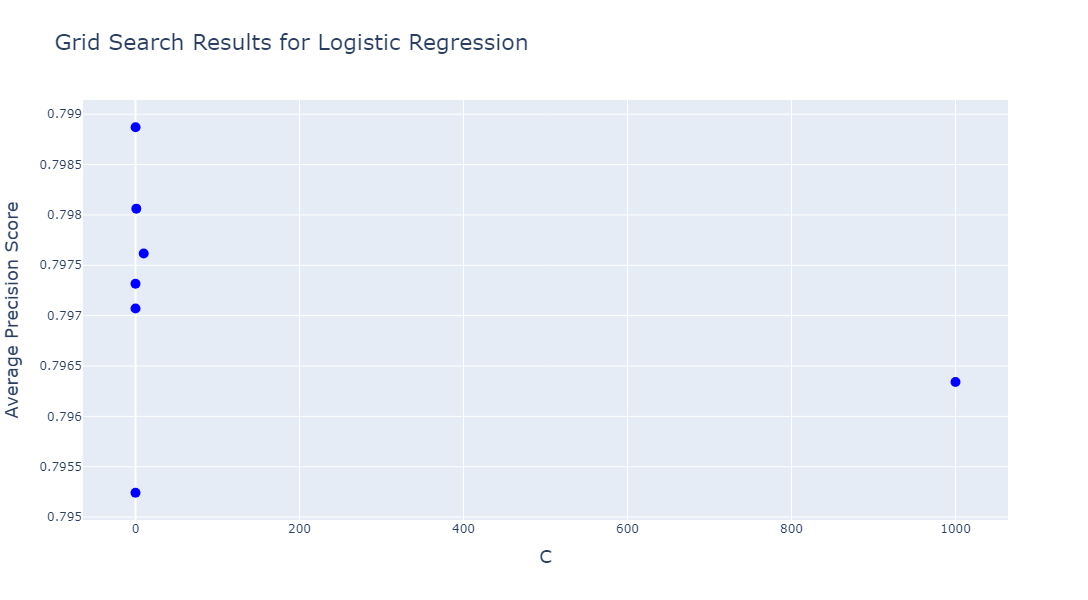

In [31]:
import plotly.graph_objs as go
import plotly.io as pio

# Set the default renderer for Plotly in JupyterLab
pio.renderers.default = 'jupyterlab'

# Extract the results of the grid search
results_gs_LR_cl = gs_LR_cl.cv_results_
params_gs_LR_cl = results_gs_LR_cl['params']
mean_test_score_gs_LR_cl = results_gs_LR_cl['mean_test_score']

# Set a constant color for all points
constant_color = 'rgba(0, 0, 255, 1)' 

# Create a scatter plot of the test scores
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[params_gs_LR_cl[i]['C'] for i in range(len(params_gs_LR_cl))],
    y=mean_test_score_gs_LR_cl,
    mode='markers',
    marker=dict(
        size=10,
        color=constant_color,
        showscale=False  
    )
))

# Set the axis labels and title with font sizes
fig.update_layout(
    title=dict(text='Grid Search Results for Logistic Regression', font=dict(size=22)),
    xaxis_title=dict(text='C', font=dict(size=18)),
    yaxis_title=dict(text='Average Precision Score', font=dict(size=18)),
    height=600,  
    width=800   
)

# Display the plot
fig.show()

# fig.write_image("your_path/fig_S2.jpg")

#### **Logistic regression classifier on the training set**

In [278]:
# print(gs_LR_cl.cv_results_)
print("Best AUPRC score (mean cross-validated score of best estimator): {}".format(gs_LR_cl.best_score_))
print("Best parameters for logistic regression classifier: {}".format(gs_LR_cl.best_params_)) # Parameter setting that gave the best results on the hold out data.

### LOGISTIC REGRESSION CLASSIFIER
# PERFORMANCE METRICS
# TRAINING SET
LR_cl_train = gs_LR_cl.best_estimator_.fit(X_train, np.ravel(y_train)) # also performed by 'GridSearchCV(refit=True)'
y_prob_LR_cl_train = LR_cl_train.predict_proba(X_train)[:, 1] # probability estimates of the positive class
y_pred_LR_cl_train = LR_cl_train.predict(X_train)

print("\nPerformance of logistic regression classifier on the training set:")
print("    AUPRC: {}".format(average_precision_score(y_train, y_prob_LR_cl_train)))
print("    AUROC: {}".format(roc_auc_score(y_train, y_prob_LR_cl_train)))
print("    Balanced accuracy: {}".format(balanced_accuracy_score(y_train, y_pred_LR_cl_train)))
print("    Brier score loss: {}".format(brier_score_loss(y_train, y_prob_LR_cl_train)))
print("    F1 score: {}".format(f1_score(y_train, y_pred_LR_cl_train)))
print("    Precision: {}".format(precision_score(y_train, y_pred_LR_cl_train)))
print("    Recall: {}".format(recall_score(y_train, y_pred_LR_cl_train)))

Best AUPRC score (mean cross-validated score of best estimator): 0.7988706648948809
Best parameters for logistic regression classifier: {'C': 0.1}

Performance of logistic regression classifier on the training set:
    AUPRC: 0.7964478991566588
    AUROC: 0.8726189161582419
    Balanced accuracy: 0.7918208044612539
    Brier score loss: 0.145099606252959
    F1 score: 0.7345537757437071
    Precision: 0.6873661670235546
    Recall: 0.7886977886977887


#### **Logistic regression classifier on the test set**

In [279]:
# print(gs_LR_cl.best_estimator_.score(X_test, y_test))
print(f"The score of the best estimator for the logistic regression classifier on the test set: {gs_LR_cl.best_estimator_.score(X_test, y_test)}")

auprc_LR_cl_test = []
auroc_LR_cl_test = []
bal_acc_LR_cl_test = []
brier_LR_cl_test = []
f1_LR_cl_test = []
prec_LR_cl_test = []
recall_LR_cl_test = []

for i in range(100):
    X_test_resampled_LR_cl, y_test_resampled_LR_cl = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_prob_LR_cl_test = LR_cl_train.predict_proba(X_test_resampled_LR_cl)[:, 1] # probability estimates of the positive class
    y_pred_LR_cl_test = LR_cl_train.predict(X_test_resampled_LR_cl)
    auprc_LR_cl_test.append(average_precision_score(y_test_resampled_LR_cl, y_prob_LR_cl_test)) # average_precision_score(y_true, y_score)
    auroc_LR_cl_test.append(roc_auc_score(y_test_resampled_LR_cl, y_prob_LR_cl_test)) # roc_auc_score(y_true, y_score)
    bal_acc_LR_cl_test.append(balanced_accuracy_score(y_test_resampled_LR_cl, y_pred_LR_cl_test)) # balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)
    brier_LR_cl_test.append(brier_score_loss(y_test_resampled_LR_cl, y_prob_LR_cl_test)) # brier_score_loss(y_true, y_prob)
    f1_LR_cl_test.append(f1_score(y_test_resampled_LR_cl, y_pred_LR_cl_test)) # f1_score(y_true, y_pred)
    prec_LR_cl_test.append(precision_score(y_test_resampled_LR_cl, y_pred_LR_cl_test)) # precision_score(y_true, y_pred)
    recall_LR_cl_test.append(recall_score(y_test_resampled_LR_cl, y_pred_LR_cl_test)) # recall_score(y_true, y_pred)

print("Mean scores for logistic regression classifier with 95% confidence intervals:")
print("    AUPRC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auprc_LR_cl_test), np.percentile(auprc_LR_cl_test, 2.5), np.percentile(auprc_LR_cl_test, 97.5)))
print("    AUROC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auroc_LR_cl_test), np.percentile(auroc_LR_cl_test, 2.5), np.percentile(auroc_LR_cl_test, 97.5)))
print("    Balanced accuracy: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(bal_acc_LR_cl_test), np.percentile(bal_acc_LR_cl_test, 2.5), np.percentile(bal_acc_LR_cl_test, 97.5)))
print("    Brier score loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(brier_LR_cl_test), np.percentile(brier_LR_cl_test, 2.5), np.percentile(brier_LR_cl_test, 97.5)))
print("    F1 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(f1_LR_cl_test), np.percentile(f1_LR_cl_test, 2.5), np.percentile(f1_LR_cl_test, 97.5)))
print("    Precision: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(prec_LR_cl_test), np.percentile(prec_LR_cl_test, 2.5), np.percentile(prec_LR_cl_test, 97.5)))
print("    Recall: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(recall_LR_cl_test), np.percentile(recall_LR_cl_test, 2.5), np.percentile(recall_LR_cl_test, 97.5)))

The score of the best estimator for the logistic regression classifier on the test set: 0.774798927613941
Mean scores for logistic regression classifier with 95% confidence intervals:
    AUPRC: 0.76 [0.69, 0.81]
    AUROC: 0.85 [0.80, 0.88]
    Balanced accuracy: 0.77 [0.72, 0.80]
    Brier score loss: 0.16 [0.14, 0.18]
    F1 score: 0.71 [0.65, 0.75]
    Precision: 0.67 [0.60, 0.73]
    Recall: 0.75 [0.67, 0.82]


### Random forest classifier

In [122]:
# TRY MORE PARAMETERS TO PREVENT OVERFITTING

### RANDOM FOREST CLASSIFIER
# GRID SEARCH WITH STRATIFIED 10-FOLD CROSS-VALIDATION
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

p_grid_RF_cl = {
    'n_estimators': [50, 100, 500, 1000],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3]}

gs_RF_cl = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0), # In scikit-learn's RandomForestClassifier, the default criterion for splitting is 'gini'
    param_grid=p_grid_RF_cl,
    scoring='average_precision',
    n_jobs=-1,
    refit=True,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    return_train_score=True)

gs_RF_cl.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 100, 500, 1000]},
             return_train_score=True, scoring='average_precision')

In [123]:
# Save the trained model to a file
import joblib

joblib.dump(gs_RF_cl, 'gs_RF_cl.pkl') 

['gs_RF_cl.pkl']

In [280]:
# Load the saved model
import joblib

gs_RF_cl = joblib.load('gs_RF_cl.pkl') 

In [281]:
best_model_RF_cl = gs_RF_cl.best_estimator_
best_model_RF_cl

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=0)

In [282]:
# Use the loaded model for predictions
predictions = gs_RF_cl.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [283]:
pd.DataFrame(gs_RF_cl.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.188908,0.010544,0.007140,0.002019,5,1,2,50,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.722884,...,0.863876,0.870353,0.861404,0.860341,0.858084,0.864928,0.869844,0.867283,0.864601,0.004434
1,0.345057,0.011554,0.010307,0.000641,5,1,2,100,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.716177,...,0.863266,0.869461,0.861301,0.862193,0.857884,0.867447,0.863775,0.865995,0.864079,0.004262
2,1.642795,0.021730,0.043311,0.003287,5,1,2,500,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.710738,...,0.865362,0.869415,0.863347,0.861132,0.860124,0.866668,0.865020,0.867047,0.865343,0.004041
3,3.796369,0.184315,0.088956,0.010574,5,1,2,1000,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.718309,...,0.866428,0.869956,0.863367,0.862893,0.859771,0.864743,0.865221,0.866624,0.865337,0.003829
4,0.182681,0.008958,0.004808,0.006328,5,1,5,50,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.717601,...,0.866350,0.870071,0.857940,0.857477,0.854397,0.858858,0.868834,0.865291,0.862343,0.005194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,4.801272,0.217534,0.119733,0.017943,15,3,5,1000,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",0.686398,...,0.953346,0.955583,0.955454,0.952786,0.952428,0.953165,0.955513,0.954423,0.954319,0.001475
104,0.236526,0.044451,0.007352,0.001548,15,3,8,50,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",0.698507,...,0.942899,0.943528,0.944659,0.942816,0.945817,0.942029,0.945848,0.943693,0.943585,0.001409
105,0.441025,0.010890,0.012695,0.001033,15,3,8,100,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",0.681057,...,0.944016,0.946113,0.944775,0.943411,0.945613,0.944703,0.946336,0.943895,0.944928,0.001172
106,2.178355,0.014124,0.052522,0.004158,15,3,8,500,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",0.686214,...,0.945439,0.947951,0.947647,0.945954,0.944343,0.945720,0.946951,0.945681,0.946277,0.001388


**Display the mean test score and the corresponding hyperparameters for each grid search**

In [284]:
import pandas as pd
from IPython.display import display

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Create a dataframe with the GridSearchCV results
results_df_gs_RF_cl = pd.DataFrame.from_dict(gs_RF_cl.cv_results_)

# Print the dataframe. Display the mean test score and the corresponding hyperparameters for each grid search run
print(results_df_gs_RF_cl[['mean_test_score', 'params']])

# Reset display options to default if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

     mean_test_score  \
0           0.783682   
1           0.785611   
2           0.788070   
3           0.788372   
4           0.785616   
5           0.787058   
6           0.788786   
7           0.787448   
8           0.777467   
9           0.782851   
10          0.785174   
11          0.785656   
12          0.784427   
13          0.786116   
14          0.788159   
15          0.787215   
16          0.785382   
17          0.789672   
18          0.786580   
19          0.786613   
20          0.779936   
21          0.783464   
22          0.784309   
23          0.786428   
24          0.782151   
25          0.786537   
26          0.782827   
27          0.784599   
28          0.782151   
29          0.786537   
30          0.782827   
31          0.784599   
32          0.782156   
33          0.783767   
34          0.783419   
35          0.785211   
36          0.767091   
37          0.767097   
38          0.764235   
39          0.761589   
40          0.76

In [285]:
import pandas as pd

# Create a dataframe with the GridSearchCV results
results_df_gs_RF_cl = pd.DataFrame.from_dict(gs_RF_cl.cv_results_)

# Display the mean test score and the corresponding hyperparameters for each grid search run
print(results_df_gs_RF_cl[['mean_test_score', 'params']])

     mean_test_score                                             params
0           0.783682  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...
1           0.785611  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...
2           0.788070  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...
3           0.788372  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...
4           0.785616  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...
..               ...                                                ...
103         0.767748  {'max_depth': 15, 'min_samples_leaf': 3, 'min_...
104         0.758691  {'max_depth': 15, 'min_samples_leaf': 3, 'min_...
105         0.761830  {'max_depth': 15, 'min_samples_leaf': 3, 'min_...
106         0.769669  {'max_depth': 15, 'min_samples_leaf': 3, 'min_...
107         0.770717  {'max_depth': 15, 'min_samples_leaf': 3, 'min_...

[108 rows x 2 columns]


**Display the grid search as an image**

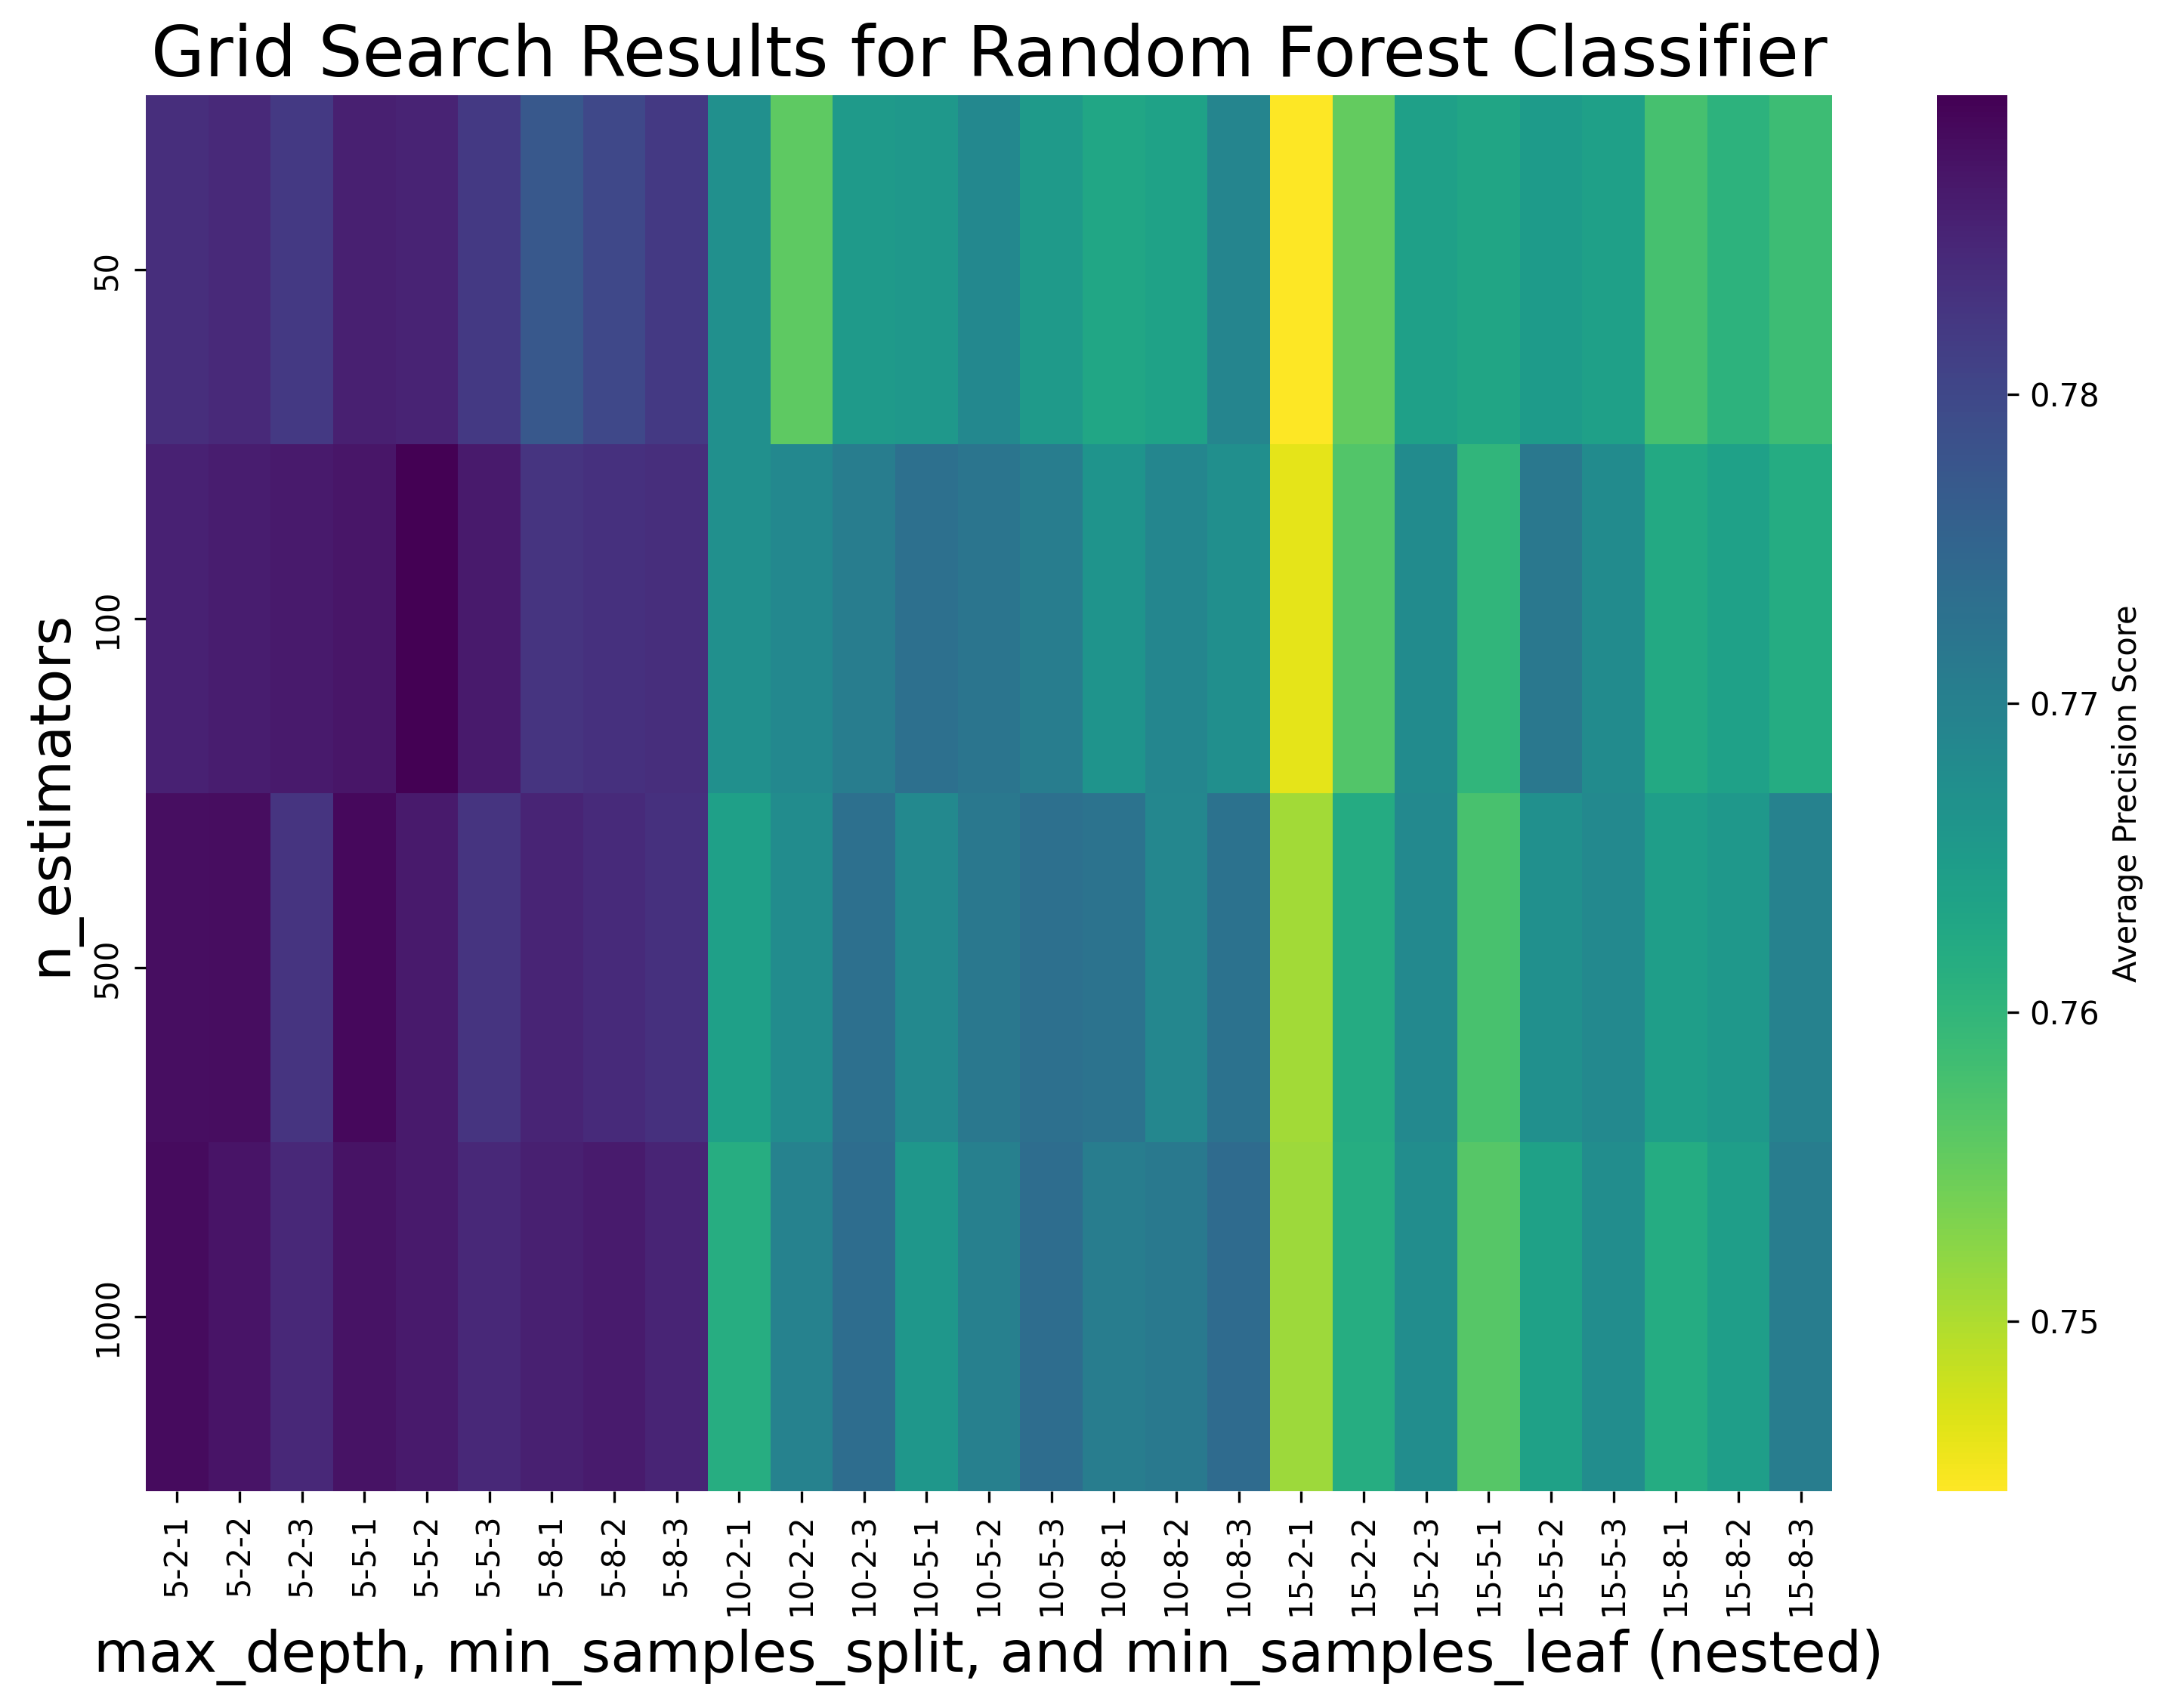

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract relevant information from grid search results
results_df_gs_RF_cl = pd.DataFrame.from_dict(gs_RF_cl.cv_results_)
heatmap_data = results_df_gs_RF_cl.pivot_table(index='param_n_estimators',
                                                columns=['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf'],
                                                values='mean_test_score')

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Set fontsize for annotations
# annot_kws = {'fontsize': 6}
# sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Mean Test Score'}, annot_kws=annot_kws)

sns.heatmap(heatmap_data, annot=False, cmap='viridis_r', fmt=".3f", cbar_kws={'label': 'Average Precision Score'})
# plt.title('Grid Search Results for Random Forest Classifier')
ax.set_title('Grid Search Results for Random Forest Classifier', fontsize=22)  
ax.set_xlabel('max_depth, min_samples_split, and min_samples_leaf (nested)', fontsize=18)  
ax.set_ylabel('n_estimators', fontsize=18) 

# Save the image
# fig.savefig("your_path/fig_S3.jpg")

# Display the plot in the Jupyter Notebook
plt.show()

**Random Forest classifier on the training set**

In [286]:
# print(gs_RF_cl.cv_results_)
print("Best AUPRC score (mean cross-validated score of best estimator): {}". format(gs_RF_cl.best_score_))
print("Best parameters for random forest classifier: {}".format(gs_RF_cl.best_params_)) # Parameter setting that gave the best results on the hold out data.

### RANDOM FOREST CLASSIFIER
# PERFORMANCE METRICS
# TRAINING SET
RF_cl_train = gs_RF_cl.best_estimator_.fit(X_train, np.ravel(y_train)) # also performed by 'GridSearchCV(refit=True)'
y_prob_RF_cl_train = RF_cl_train.predict_proba(X_train)[:, 1] # probability estimates of the positive class
y_pred_RF_cl_train = RF_cl_train.predict(X_train)

print("\nPerformance of random forest classifier on training set:")
print("    AUPRC: {}".format(average_precision_score(y_train, y_prob_RF_cl_train)))
print("    AUROC: {}".format(roc_auc_score(y_train, y_prob_RF_cl_train)))
print("    Balanced accuracy: {}".format(balanced_accuracy_score(y_train, y_pred_RF_cl_train)))
print("    Brier score loss: {}".format(brier_score_loss(y_train, y_prob_RF_cl_train)))
print("    F1 score: {}".format(f1_score(y_train, y_pred_RF_cl_train)))
print("    Precision: {}".format(precision_score(y_train, y_pred_RF_cl_train)))
print("    Recall: {}".format(recall_score(y_train, y_pred_RF_cl_train)))

Best AUPRC score (mean cross-validated score of best estimator): 0.7896715518564028
Best parameters for random forest classifier: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Performance of random forest classifier on training set:
    AUPRC: 0.8590834847462558
    AUROC: 0.9035712806780223
    Balanced accuracy: 0.8081622863926234
    Brier score loss: 0.12644077320469257
    F1 score: 0.7578947368421053
    Precision: 0.8158640226628895
    Recall: 0.7076167076167076


**Random Forest classifier on the test set**

In [287]:
# print(gs_RF_cl.best_estimator_.score(X_test, y_test))
print(f"The score of the best estimator for the Random Forest Classifier on the test set: {gs_RF_cl.best_estimator_.score(X_test, y_test)}")

auprc_RF_cl_test = []
auroc_RF_cl_test = []
bal_acc_RF_cl_test = []
brier_RF_cl_test = []
f1_RF_cl_test = []
prec_RF_cl_test = []
recall_RF_cl_test = []

for i in range(100):
    X_test_resampled_RF_cl, y_test_resampled_RF_cl = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_prob_RF_cl_test = RF_cl_train.predict_proba(X_test_resampled_RF_cl)[:, 1] # probability estimates of the positive class. RF_cl_train was created during the training
    y_pred_RF_cl_test = RF_cl_train.predict(X_test_resampled_RF_cl)
    auprc_RF_cl_test.append(average_precision_score(y_test_resampled_RF_cl, y_prob_RF_cl_test)) # average_precision_score(y_true, y_score)
    auroc_RF_cl_test.append(roc_auc_score(y_test_resampled_RF_cl, y_prob_RF_cl_test)) # roc_auc_score(y_true, y_score)
    bal_acc_RF_cl_test.append(balanced_accuracy_score(y_test_resampled_RF_cl, y_pred_RF_cl_test)) # balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)
    brier_RF_cl_test.append(brier_score_loss(y_test_resampled_RF_cl, y_prob_RF_cl_test)) # brier_score_loss(y_true, y_prob)
    f1_RF_cl_test.append(f1_score(y_test_resampled_RF_cl, y_pred_RF_cl_test)) # f1_score(y_true, y_pred)
    prec_RF_cl_test.append(precision_score(y_test_resampled_RF_cl, y_pred_RF_cl_test)) # precision_score(y_true, y_pred)
    recall_RF_cl_test.append(recall_score(y_test_resampled_RF_cl, y_pred_RF_cl_test)) # recall_score(y_true, y_pred)

print("Mean scores for random forest classifier with 95% confidence intervals:")
print("    AUPRC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auprc_RF_cl_test), np.percentile(auprc_RF_cl_test, 2.5), np.percentile(auprc_RF_cl_test, 97.5)))
print("    AUROC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auroc_RF_cl_test), np.percentile(auroc_RF_cl_test, 2.5), np.percentile(auroc_RF_cl_test, 97.5)))
print("    Balanced accuracy: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(bal_acc_RF_cl_test), np.percentile(bal_acc_RF_cl_test, 2.5), np.percentile(bal_acc_RF_cl_test, 97.5)))
print("    Brier score loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(brier_RF_cl_test), np.percentile(brier_RF_cl_test, 2.5), np.percentile(brier_RF_cl_test, 97.5)))
print("    F1 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(f1_RF_cl_test), np.percentile(f1_RF_cl_test, 2.5), np.percentile(f1_RF_cl_test, 97.5)))
print("    Precision: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(prec_RF_cl_test), np.percentile(prec_RF_cl_test, 2.5), np.percentile(prec_RF_cl_test, 97.5)))
print("    Recall: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(recall_RF_cl_test), np.percentile(recall_RF_cl_test, 2.5), np.percentile(recall_RF_cl_test, 97.5)))

The score of the best estimator for the Random Forest Classifier on the test set: 0.7774798927613941
Mean scores for random forest classifier with 95% confidence intervals:
    AUPRC: 0.73 [0.66, 0.80]
    AUROC: 0.83 [0.79, 0.86]
    Balanced accuracy: 0.75 [0.72, 0.79]
    Brier score loss: 0.16 [0.15, 0.18]
    F1 score: 0.68 [0.63, 0.72]
    Precision: 0.72 [0.65, 0.78]
    Recall: 0.65 [0.58, 0.72]


### Support Vector Machine (SVM) classifier

In [131]:
### SVM CLASSIFIER
# GRID SEARCH WITH STRATIFIED 10-FOLD CROSS-VALIDATION
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

p_grid_SVC_cl = [
    {'C': [0.01, 0.1, 1, 10, 100, 500, 1000], # np.logspace(-2, 10, 13)
    'kernel': ['rbf'],
    'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}, # np.logspace(-9, 3, 13)
    {'C': [0.01, 0.1, 1, 10, 100, 500, 1000], # np.logspace(-2, 10, 13)
    'kernel': ['linear']}]

gs_SVC_cl = GridSearchCV(
    estimator=SVC(class_weight='balanced', random_state=0, probability=True),
    param_grid=p_grid_SVC_cl,
    scoring='average_precision',
    n_jobs=-1,
    refit=True,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    return_train_score=True)

gs_SVC_cl.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=0),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'kernel': ['linear']}],
             return_train_score=True, scoring='average_precision')

In [132]:
# Save the trained model to a file
import joblib

joblib.dump(gs_SVC_cl, 'gs_SVC_cl.pkl') 

['gs_SVC_cl.pkl']

In [288]:
# Load the saved model
import joblib

gs_SVC_cl = joblib.load('gs_SVC_cl.pkl') 

In [289]:
best_model_SVM_cl = gs_SVC_cl.best_estimator_
best_model_SVM_cl

SVC(C=1000, class_weight='balanced', gamma=1e-05, probability=True,
    random_state=0)

In [290]:
# Use the loaded model for predictions
predictions = gs_SVC_cl.predict(X_test)
predictions
# pd.DataFrame(gs_SVC_cl.cv_results_)

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,

**Display the mean test score and the corresponding hyperparameters for each grid search**



In [291]:
import pandas as pd

# Create a dataframe with the GridSearchCV results
results_df_gs_SVM_cl = pd.DataFrame.from_dict(gs_SVC_cl.cv_results_)

# Display the mean test score and the corresponding hyperparameters for each grid search run
print(results_df_gs_SVM_cl[['mean_test_score', 'params']])

    mean_test_score                                         params
0          0.794651   {'C': 0.01, 'gamma': 1e-05, 'kernel': 'rbf'}
1          0.794631  {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
2          0.794857   {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
3          0.794826    {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
4          0.791338     {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
5          0.741115       {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
6          0.626249      {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
7          0.794651    {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
8          0.794631   {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
9          0.794725    {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
10         0.796703     {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
11         0.790996      {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
12         0.744310        {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
13         0.626249       {'C': 0.1, 'gamma': 10, 'kernel': 'r

<br>

**Display the GridSearchCV as an image**

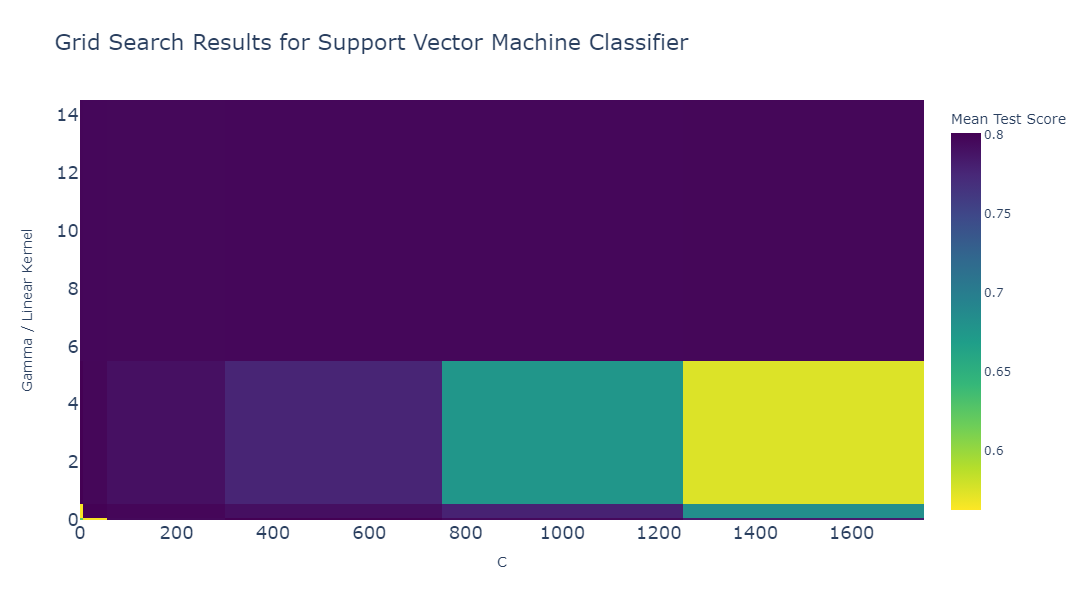

In [43]:
import plotly.graph_objs as go
import plotly.io as pio

# Set the default renderer for Plotly in JupyterLab
pio.renderers.default = 'jupyterlab'

# Extract the results of the grid search
results_gs_SVC_cl = gs_SVC_cl.cv_results_
params_gs_SVC_cl = results_gs_SVC_cl['params']
mean_test_score_gs_SVC_cl = results_gs_SVC_cl['mean_test_score']

# Extract unique values for C and gamma
unique_C = sorted(set(param['C'] for param in params_gs_SVC_cl))
unique_gamma = sorted(set(param['gamma'] for param in params_gs_SVC_cl if param['kernel'] == 'rbf'))

# Create a heatmap trace
heatmap = go.Heatmap(
    x=unique_C,
    y=unique_gamma,
    z=mean_test_score_gs_SVC_cl.reshape(len(unique_gamma), -1),  # Automatically determine the size
    colorscale='Viridis_r',
    colorbar=dict(title='Mean Test Score'),
    hoverinfo='text',
    text=[[f"Kernel: {param['kernel']}, C: {param['C']}, Gamma: {param['gamma']}" if param['kernel'] == 'rbf' else f"Kernel: {param['kernel']}, C: {param['C']}" for param in params_gs_SVC_cl]],
)

# Create a layout
layout = go.Layout(
    title='Grid Search Results for Support Vector Machine Classifier',
    title_font=dict(size=22),  
    xaxis=dict(title='C', tickfont=dict(size=18)),  
    yaxis=dict(title='Gamma / Linear Kernel', tickfont=dict(size=18)),
    height=600, 
    width=800  
)

# Create a figure
fig = go.Figure(data=[heatmap], layout=layout)

# Display the plot
fig.show()

# fig.write_image("your_path/fig_S4.jpg")

### **SVM on the training set**

In [292]:
# print(gs_SVC_cl.cv_results_)
print("Best AUPRC score (mean cross-validated score of best estimator): {}". format(gs_SVC_cl.best_score_))
print("Best parameters for SVM classifier: {}".format(gs_SVC_cl.best_params_)) # Parameter setting that gave the best results on the hold out data.

### SVM CLASSIFIER
# PERFORMANCE METRICS
# TRAINING SET
SVM_cl_train = gs_SVC_cl.best_estimator_.fit(X_train, np.ravel(y_train)) # also performed by 'GridSearchCV(refit=True)'
y_prob_SVM_cl_train = SVM_cl_train.predict_proba(X_train)[:, 1] # probability estimates of the positive class
y_pred_SVM_cl_train = SVM_cl_train.predict(X_train)

print("\nPerformance of SVM classifier on training set:")
print("    AUPRC: {}".format(average_precision_score(y_train, y_prob_SVM_cl_train)))
print("    AUROC: {}".format(roc_auc_score(y_train, y_prob_SVM_cl_train)))
print("    Balanced accuracy: {}".format(balanced_accuracy_score(y_train, y_pred_SVM_cl_train)))
print("    Brier score loss: {}".format(brier_score_loss(y_train, y_prob_SVM_cl_train)))
print("    F1 score: {}".format(f1_score(y_train, y_pred_SVM_cl_train)))
print("    Precision: {}".format(precision_score(y_train, y_pred_SVM_cl_train)))
print("    Recall: {}".format(recall_score(y_train, y_pred_SVM_cl_train)))

Best AUPRC score (mean cross-validated score of best estimator): 0.8012086270533004
Best parameters for SVM classifier: {'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}

Performance of SVM classifier on training set:
    AUPRC: 0.7963908871472832
    AUROC: 0.8724325704662783
    Balanced accuracy: 0.7900660491952627
    Brier score loss: 0.13662208653081861
    F1 score: 0.7324913892078071
    Precision: 0.6875
    Recall: 0.7837837837837838


### **SVM on the test set**

In [293]:
# print(gs_SVC_cl.best_estimator_.score(X_test, y_test))
print(f"The score of the best estimator for the Support Vector Machine Classifier on the test set: {gs_SVC_cl.best_estimator_.score(X_test, y_test)}")

auprc_SVC_cl_test = []
auroc_SVC_cl_test = []
bal_acc_SVC_cl_test = []
brier_SVC_cl_test = []
f1_SVC_cl_test = []
prec_SVC_cl_test = []
recall_SVC_cl_test = []

for i in range(100):
    X_test_resampled_SVM_cl, y_test_resampled_SVM_cl = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_prob_SVM_cl_test = SVM_cl_train.predict_proba(X_test_resampled_SVM_cl)[:, 1] # probability estimates of the positive class
    y_pred_SVM_cl_test = SVM_cl_train.predict(X_test_resampled_SVM_cl)
    auprc_SVC_cl_test.append(average_precision_score(y_test_resampled_SVM_cl, y_prob_SVM_cl_test)) # average_precision_score(y_true, y_score)
    auroc_SVC_cl_test.append(roc_auc_score(y_test_resampled_SVM_cl, y_prob_SVM_cl_test)) # roc_auc_score(y_true, y_score)
    bal_acc_SVC_cl_test.append(balanced_accuracy_score(y_test_resampled_SVM_cl, y_pred_SVM_cl_test)) # balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)
    brier_SVC_cl_test.append(brier_score_loss(y_test_resampled_SVM_cl, y_prob_SVM_cl_test)) # brier_score_loss(y_true, y_prob)
    f1_SVC_cl_test.append(f1_score(y_test_resampled_SVM_cl, y_pred_SVM_cl_test)) # f1_score(y_true, y_pred)
    prec_SVC_cl_test.append(precision_score(y_test_resampled_SVM_cl, y_pred_SVM_cl_test)) # precision_score(y_true, y_pred)
    recall_SVC_cl_test.append(recall_score(y_test_resampled_SVM_cl, y_pred_SVM_cl_test)) # recall_score(y_true, y_pred)

print("Mean scores for SVM classifier with 95% confidence intervals:")
print("    AUPRC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auprc_SVC_cl_test), np.percentile(auprc_SVC_cl_test, 2.5), np.percentile(auprc_SVC_cl_test, 97.5)))
print("    AUROC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auroc_SVC_cl_test), np.percentile(auroc_SVC_cl_test, 2.5), np.percentile(auroc_SVC_cl_test, 97.5)))
print("    Balanced accuracy: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(bal_acc_SVC_cl_test), np.percentile(bal_acc_SVC_cl_test, 2.5), np.percentile(bal_acc_SVC_cl_test, 97.5)))
print("    Brier score loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(brier_SVC_cl_test), np.percentile(brier_SVC_cl_test, 2.5), np.percentile(brier_SVC_cl_test, 97.5)))
print("    F1 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(f1_SVC_cl_test), np.percentile(f1_SVC_cl_test, 2.5), np.percentile(f1_SVC_cl_test, 97.5)))
print("    Precision: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(prec_SVC_cl_test), np.percentile(prec_SVC_cl_test, 2.5), np.percentile(prec_SVC_cl_test, 97.5)))
print("    Recall: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(recall_SVC_cl_test), np.percentile(recall_SVC_cl_test, 2.5), np.percentile(recall_SVC_cl_test, 97.5)))

The score of the best estimator for the Support Vector Machine Classifier on the test set: 0.7882037533512064
Mean scores for SVM classifier with 95% confidence intervals:
    AUPRC: 0.76 [0.69, 0.81]
    AUROC: 0.85 [0.80, 0.88]
    Balanced accuracy: 0.78 [0.74, 0.82]
    Brier score loss: 0.15 [0.14, 0.17]
    F1 score: 0.72 [0.67, 0.76]
    Precision: 0.69 [0.63, 0.76]
    Recall: 0.76 [0.70, 0.83]


## **Figures 1 (a, b, c, d, e)**

In [340]:
import matplotlib as mpl

cm = 1/2.54  # centimeters in inches
mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 14
mpl.rcParams["xtick.labelsize"] = 8
mpl.rcParams["ytick.labelsize"] = 8
mpl.rcParams["legend.fontsize"] = 14

In [341]:
fig1 = plt.figure(layout='tight', figsize=(18*cm, 30*cm))
gs1 = fig1.add_gridspec(3, 2, **{"wspace":  0.3, "hspace": 0.35})

<Figure size 2125.98x3543.31 with 0 Axes>

**AUPRC IN EACH ML ALGORITHM AND IN THE BASELINE MODELS**

In [342]:
import numpy as np
import matplotlib.pyplot as plt

# Scores of AUPRC in each ML algorithm (logistic regession, random forest, SVM) on the training set
train_scores = [0.7964273386775098, 0.8590834847462558, 0.796390887147283, 0, 0, 0] # AUPRC SCORES

# Mean scores with 95% confidence intervals
# Mean scores of AUPRC with 95% confidence intervals in each ML algorithm (logistic regession, random forest, SVM) on the test set AND BASELINES (DUMMY MODELS)
mean_scores = [0.76, 0.73, 0.76, 0.36, 0.36, 0.36]
lower_ci = [0.69, 0.66, 0.69, 0.33, 0.33, 0.32]
upper_ci = [0.81, 0.80, 0.81, 0.40, 0.40, 0.42]

# Calculate error bars
lower_error = np.array(mean_scores) - np.array(lower_ci)
upper_error = np.array(upper_ci) - np.array(mean_scores)

# Set the labels for the performance metrics
# labels = ['Logistic\nregression', 'Random\nforest', 'SVM', 'Uniform\nrandom', 'Most\nfrequent', 'Stratified\nrandom']
labels = ['LR', 'RF', 'SVM', 'UNI BL', 'MFREQ BL', 'STRAT BL']

# Set the x-axis values
x = np.arange(len(labels))

# Set the colors
train_color = 'lightblue'
test_color =  'blue'

# Plot the bar chart
ax4a = fig1.add_subplot(gs1[0, 0])

# Plot the bars
ax4a.bar(x - 0.2, train_scores, width=0.4, label='Training Set', color=train_color)
ax4a.bar(x + 0.2, mean_scores, width=0.4, yerr=(lower_error, upper_error), label='Test Set', color=test_color)

# Add horizontal grid lines
ax4a.set_axisbelow(True) 
ax4a.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Set the axis labels and title
# ax.set_xlabel('Machine learning algorithms and baseline models', fontsize=18)
ax4a.set_ylabel('AUPRC scores')
ax4a.set_title('($\\bf{A}$) AUPRC')  

# Set the x-axis tick labels
ax4a.set_xticks(x)
_ = ax4a.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

# Add a legend
# ax.legend()

# Show the plot
# plt.show()

**AUROC IN EACH ML ALGORITHM AND IN THE BASELINE MODELS**

In [343]:
import numpy as np
import matplotlib.pyplot as plt

# Scores of AUROC in each ML algorithm (logistic regession, random forest, SVM) on the training set
train_scores = [0.8726223670043894, 0.9035712806780223, 0.8724325704662783, 0, 0, 0] # AUROC SCORES

# Mean scores with 95% confidence intervals
# Mean scores of AUROC with 95% confidence intervals in each ML algorithm (logistic regession, random forest, SVM) on the test set AND BASELINES (DUMMY MODELS)
mean_scores = [0.85, 0.83, 0.85, 0.50, 0.50, 0.50]
lower_ci = [0.80, 0.79, 0.80, 0.50, 0.50, 0.44]
upper_ci = [0.88, 0.86, 0.88, 0.50, 0.50, 0.55]

# Calculate error bars
lower_error = np.array(mean_scores) - np.array(lower_ci)
upper_error = np.array(upper_ci) - np.array(mean_scores)

# Set the labels for the performance metrics
# labels = ['Logistic\nregression', 'Random\nforest', 'SVM', 'Uniform\nrandom', 'Most\nfrequent', 'Stratified\nrandom']
labels = ['LR', 'RF', 'SVM', 'UNI BL', 'MFREQ BL', 'STRAT BL']

# Set the x-axis values
x = np.arange(len(labels))

# Set the colors
train_color = 'lightblue'
test_color =  'blue'

# Plot the bar chart
ax4b = fig1.add_subplot(gs1[0, 1])

# Plot the bars
ax4b.bar(x - 0.2, train_scores, width=0.4, label='Training Set', color=train_color)
ax4b.bar(x + 0.2, mean_scores, width=0.4, yerr=(lower_error, upper_error), label='Test Set', color=test_color)

# Add horizontal grid lines
ax4b.set_axisbelow(True) 
ax4b.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Set the axis labels and title
# ax.set_xlabel('Machine learning algorithms and baseline models', fontsize=18)
ax4b.set_ylabel('AUROC scores')
ax4b.set_title('($\\bf{B}$) AUROC') 

# Set the x-axis tick labels
ax4b.set_xticks(x)
_ = ax4b.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

# Add a legend
# ax.legend()

# Show the plot
# plt.show()

**BALANCED ACCURACY IN EACH ML ALGORITHM AND IN THE BASELINE MODELS**

In [344]:
import numpy as np
import matplotlib.pyplot as plt

# (we plot 1 - Brier score)
# Scores of BALANCED ACCURACY in each ML algorithm (logistic regession, random forest, SVM) on the training set
train_scores = [0.7918208044612539, 0.8081622863926234, 0.7900660491952627, 0, 0, 0] # BALANCED ACCURACY SCORES

# Mean scores with 95% confidence intervals (we plot 1 - Brier score)
# Mean scores of BALANCED ACCURACY with 95% confidence intervals in each ML algorithm (logistic regession, random forest, SVM) on the test set AND BASELINES (DUMMY MODELS)
mean_scores = [0.77, 0.75, 0.78, 0.50, 0.50, 0.50]
lower_ci = [0.72, 0.72, 0.74, 0.45, 0.50, 0.44]
upper_ci = [0.80, 0.79, 0.82, 0.55, 0.50, 0.55]

# Calculate error bars
lower_error = np.array(mean_scores) - np.array(lower_ci)
upper_error = np.array(upper_ci) - np.array(mean_scores)

# Set the labels for the performance metrics
# labels = ['Logistic\nregression', 'Random\nforest', 'SVM', 'Uniform\nrandom', 'Most\nfrequent', 'Stratified\nrandom']
labels = ['LR', 'RF', 'SVM', 'UNI BL', 'MFREQ BL', 'STRAT BL']

# Set the x-axis values
x = np.arange(len(labels))

# Set the colors
train_color = 'lightblue'
test_color =  'blue'

# Plot the bar chart
ax4c = fig1.add_subplot(gs1[1, 0])

# Plot the bars
ax4c.bar(x - 0.2, train_scores, width=0.4, label='Training Set', color=train_color)
ax4c.bar(x + 0.2, mean_scores, width=0.4, yerr=(lower_error, upper_error), label='Test Set', color=test_color)

# Add horizontal grid lines
ax4c.set_axisbelow(True) 
ax4c.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Set the axis labels and title
# ax.set_xlabel('Machine learning algorithms and baseline models', fontsize=18)
ax4c.set_ylabel('Balanced Accuracy scores')
ax4c.set_title('($\\bf{C}$) Balanced Accuracy')  

# Set the x-axis tick labels
ax4c.set_xticks(x)
_ = ax4c.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

# Add a legend
# ax.legend()

# Show the plot
# plt.show()

**BRIER SCORE LOSS IN EACH ML ALGORITHM AND IN THE BASELINE MODELS**

**Note: Brier score is plotted as 1-Brier so that higher is always better for all methods.**

In [345]:
import numpy as np
import matplotlib.pyplot as plt

# (we plot 1 - Brier score)
# Scores of BRIER SCORE LOSS in each ML algorithm (logistic regession, random forest, SVM) on the training set
train_scores = [0.8548965291140255, 0.8735592267953074, 0.8633779134691814, 0, 0, 0] # BRIER LOSS SCORES

# Mean scores with 95% confidence intervals (we plot 1 - Brier score)
# Mean scores of BRIER SCORE LOSS with 95% confidence intervals in each ML algorithm (logistic regession, random forest, SVM) on the test set AND BASELINES (DUMMY MODELS)
mean_scores = [0.84, 0.84, 0.85, 0.75, 0.64, 0.54]
lower_ci = [0.8200000000000001, 0.8200000000000001, 0.83, 0.75, 0.6, 0.49]
upper_ci = [0.86, 0.85, 0.86, 0.75, 0.6699999999999999, 0.5800000000000001]

# Calculate error bars
lower_error = np.array(mean_scores) - np.array(lower_ci)
upper_error = np.array(upper_ci) - np.array(mean_scores)

# Set the labels for the performance metrics
# labels = ['Logistic\nregression', 'Random\nforest', 'SVM', 'Uniform\nrandom', 'Most\nfrequent', 'Stratified\nrandom']
labels = ['LR', 'RF', 'SVM', 'UNI BL', 'MFREQ BL', 'STRAT BL']

# Set the x-axis values
x = np.arange(len(labels))

# Set the colors
train_color = 'lightblue'
test_color =  'blue'

# Plot the bar chart
ax4d = fig1.add_subplot(gs1[1, 1])

# Plot the bars
ax4d.bar(x - 0.2, train_scores, width=0.4, label='Training Set', color=train_color)
ax4d.bar(x + 0.2, mean_scores, width=0.4, yerr=(lower_error, upper_error), label='Test Set', color=test_color)

# Add horizontal grid lines
ax4d.set_axisbelow(True) 
ax4d.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Set the axis labels and title
# ax.set_xlabel('Machine learning algorithms and baseline models', fontsize=18)
ax4d.set_ylabel('Brier Loss scores')
ax4d.set_title('($\\bf{D}$) Brier Loss') 

# Set the x-axis tick labels
ax4d.set_xticks(x)
_ = ax4d.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

**F1 SCORE IN EACH ML ALGORITHM AND IN THE BASELINE MODELS**

In [346]:
import numpy as np
import matplotlib.pyplot as plt

# Scores of F1 SCORE in each ML algorithm (logistic regession, random forest, SVM) on the training set
train_scores = [0.7345537757437072, 0.7578947368421053, 0.7324913892078071, 0, 0, 0] # F1 SCORES

# Mean scores with 95% confidence intervals
# Mean scores of F1 SCORE with 95% confidence intervals in each ML algorithm (logistic regession, random forest, SVM) on the test set AND BASELINES (DUMMY MODELS)
mean_scores = [0.71, 0.68, 0.72, 0.43, 0.00, 0.36]
lower_ci = [0.65, 0.63, 0.67, 0.37, 0.00, 0.30]
upper_ci = [0.75, 0.72, 0.76, 0.49, 0.00, 0.43]

# Calculate error bars
lower_error = np.array(mean_scores) - np.array(lower_ci)
upper_error = np.array(upper_ci) - np.array(mean_scores)

# Set the labels for the performance metrics
# labels = ['Logistic\nregression', 'Random\nforest', 'SVM', 'Uniform\nrandom', 'Most\nfrequent', 'Stratified\nrandom']
labels = ['LR', 'RF', 'SVM', 'UNI BL', 'MFREQ BL', 'STRAT BL']

# Set the x-axis values
x = np.arange(len(labels))

# Set the colors
train_color = 'lightblue'
test_color =  'blue'

# Plot the bar chart
ax4e = fig1.add_subplot(gs1[2, 0])

# Plot the bars
ax4e.bar(x - 0.2, train_scores, width=0.4, label='Training Set', color=train_color)
ax4e.bar(x + 0.2, mean_scores, width=0.4, yerr=(lower_error, upper_error), label='Test Set', color=test_color)

# Add horizontal grid lines
ax4e.set_axisbelow(True) 
ax4e.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Set the axis labels and title
ax4e.set_xlabel('Machine learning algorithms and baseline models', fontsize=10)
ax4e.set_ylabel('F1 scores')
ax4e.set_title('($\\bf{E}$) F1')

# Set the x-axis tick labels
ax4e.set_xticks(x)
_ = ax4e.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

C:\Users\stein\AppData\Local\Temp\ipykernel_10252\1098271849.py:24: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

C:\Users\stein\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



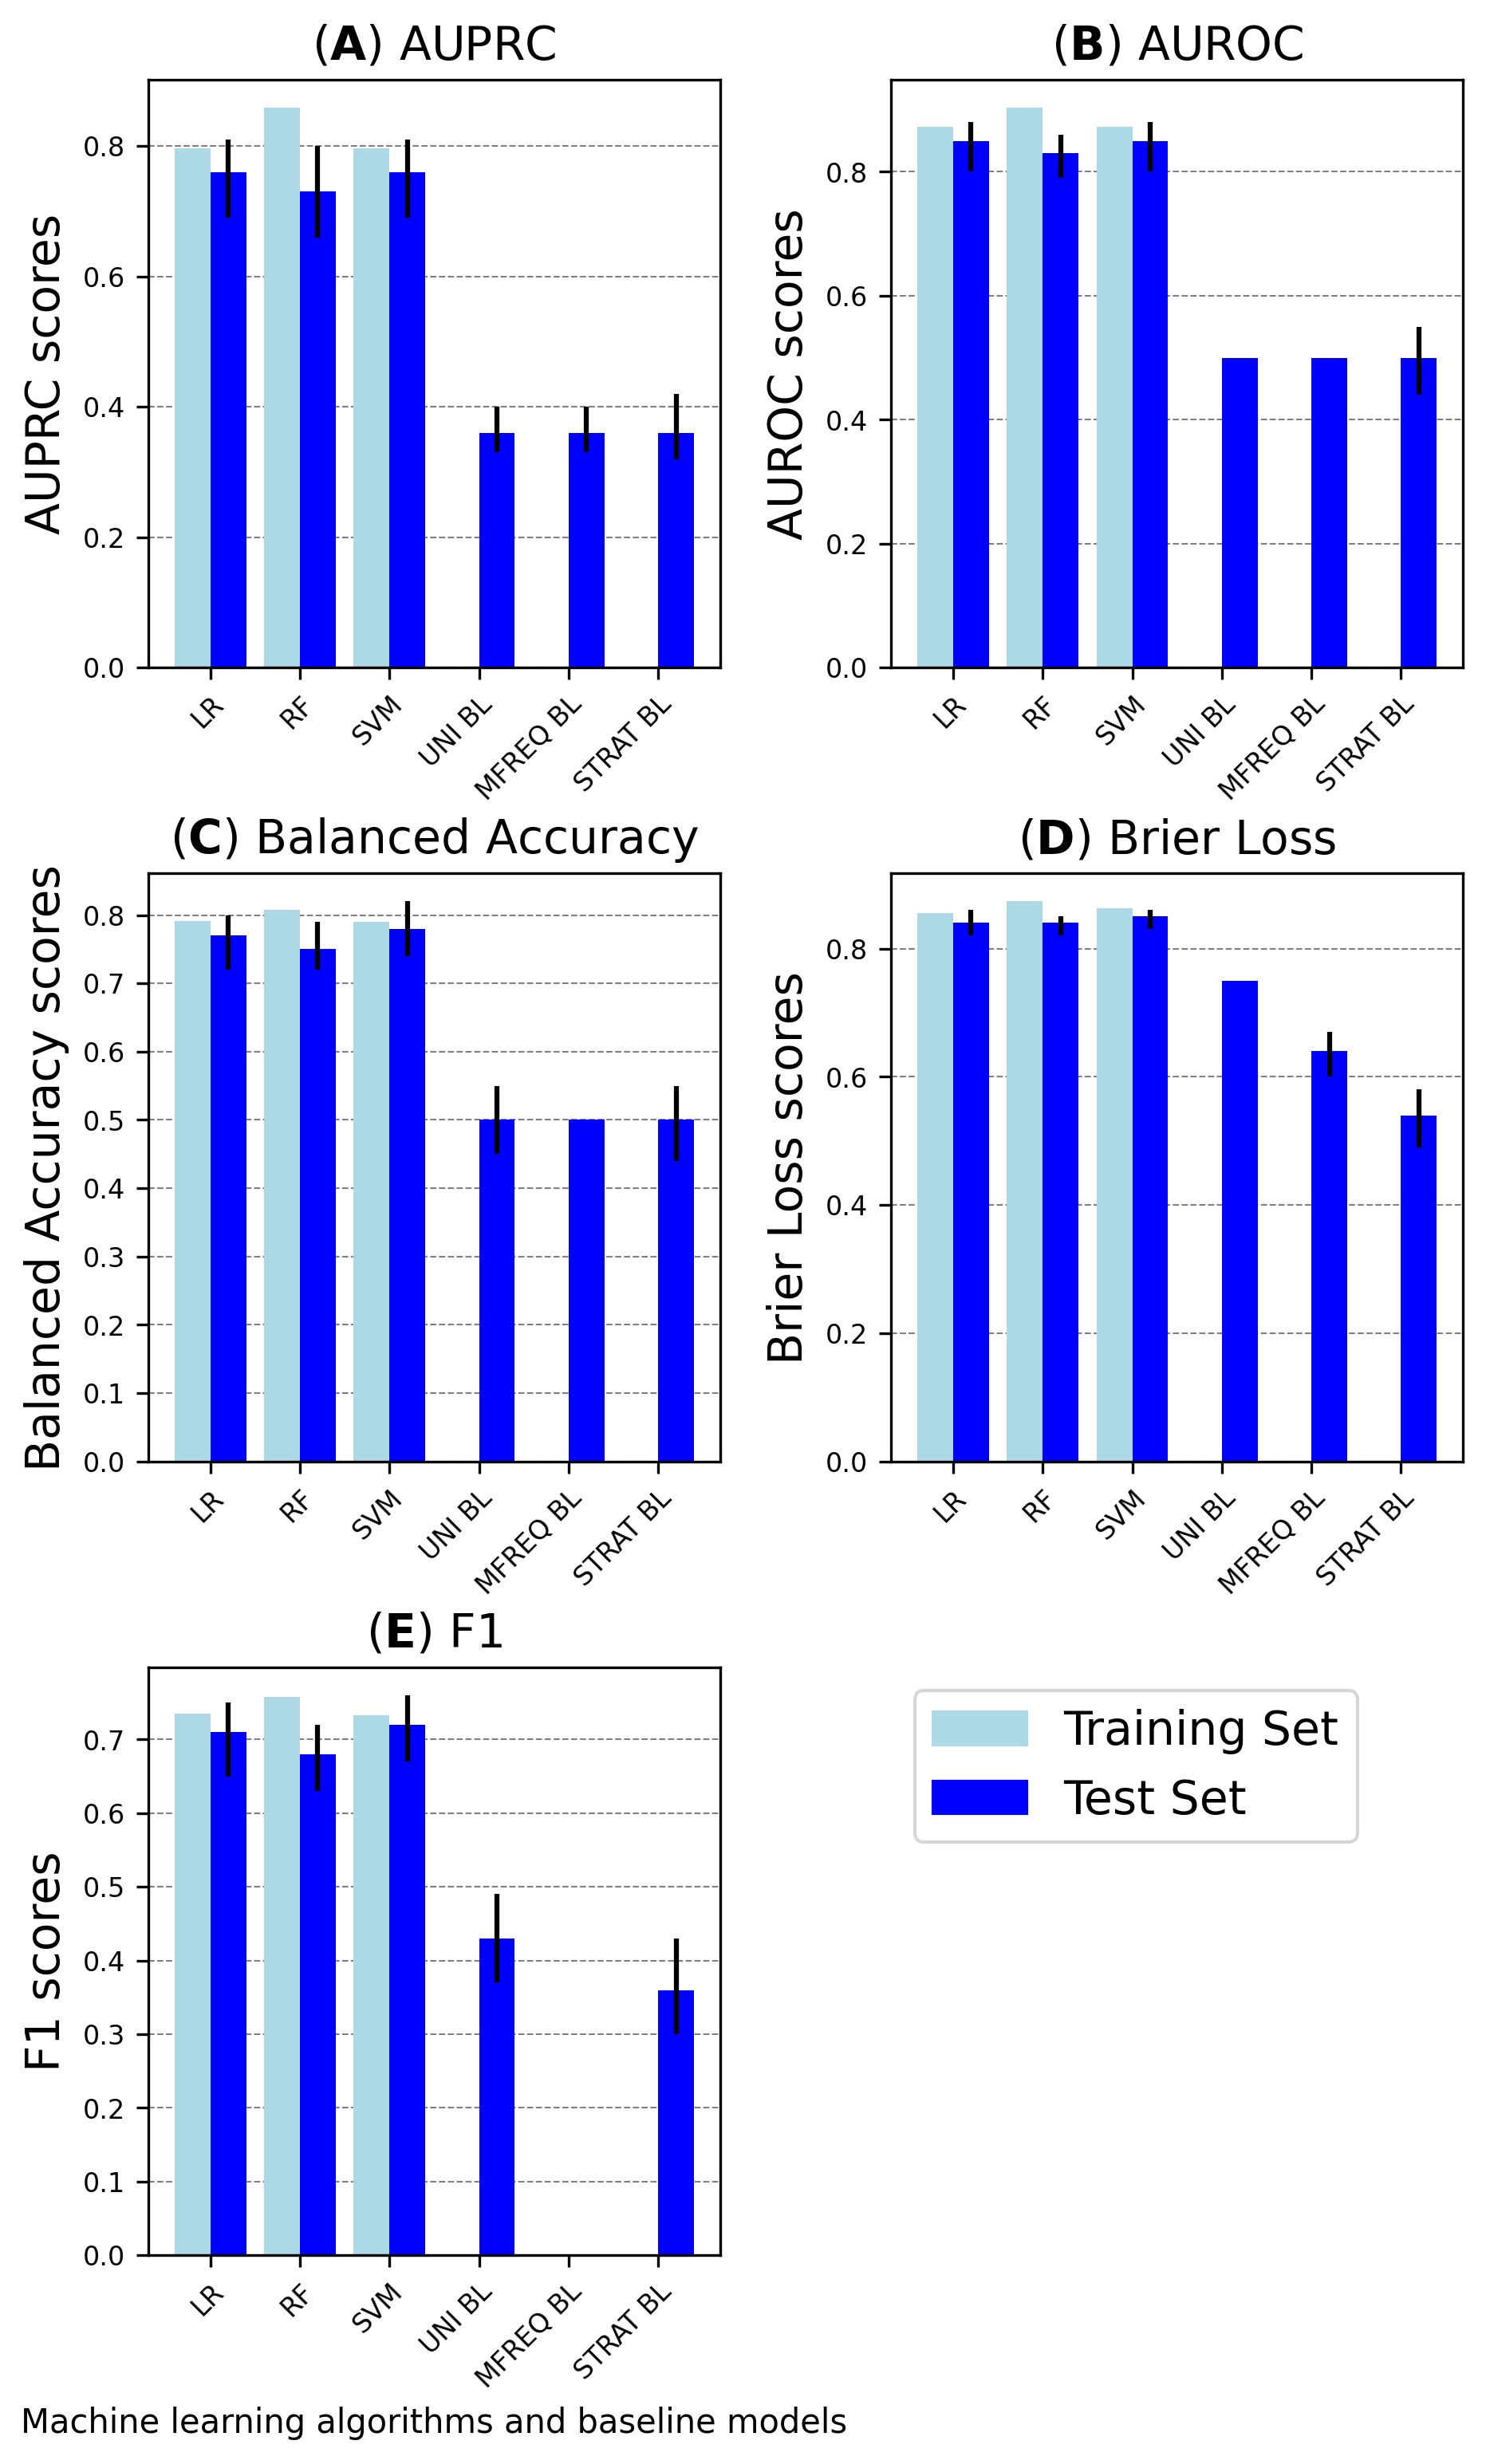

In [347]:
import matplotlib.patches as mpatches

# Colors
train_color = 'lightblue'
test_color = 'blue'

# Create legend handles
legend_handles = [
    mpatches.Patch(color=train_color, label='Training Set'),
    mpatches.Patch(color=test_color, label='Test Set')
]

# Create legend
ax4f = fig1.add_subplot(gs1[2, 1])

ax4f.legend(handles=legend_handles, loc='upper left')

# Hide the axes to show only the legend
ax4f.axis('off')


# Show the plot
# plt.show()
# fig1.savefig("your_path/fig1abcde.jpg", pad_inches=0.1, bbox_inches="tight")
# fig1

### **Figures 2 (a, b)**

In [336]:
mpl.rcdefaults()
mpl.rcParams["figure.dpi"] = 300
fig2 = plt.figure(layout='tight', figsize=(18*cm, 30*cm))

gs2 = fig2.add_gridspec(2, 1, **{"wspace":  0, "hspace": 0.35})

<Figure size 2125.98x3543.31 with 0 Axes>

In [337]:
### AUPRC PLOT
### POSITIVE CLASS # DEPRESSED
from sklearn.metrics import precision_recall_curve, auc, PrecisionRecallDisplay # from_predictions(y_true, y_pred, sample_weight=None, pos_label=None, name=None, ax=None)
import matplotlib.pyplot as plt

# Model predictions
y_score_uniform_rand = uniform_rand_clf.predict_proba(X_test)[:, 1] # UNIFORM RANDOM BASELINE
y_score_mfreq = mfreq_clf.predict_proba(X_test)[:, 1] # MOST FREQUENT BASELINE
y_score_strat_rand = strat_rand_clf.predict_proba(X_test)[:, 1] # STRATIFIED RANDOM BASELINE
y_score_LR = LR_cl_train.predict_proba(X_test)[:, 1] # LOGISTIC REGRESSION CLASSIFIER
y_score_RF = RF_cl_train.predict_proba(X_test)[:, 1] # RANDOM FOREST CLASSIFIER
y_score_SVC = SVM_cl_train.predict_proba(X_test)[:, 1] # SVM CLASSIFIER

ax_auprc1 = fig2.add_subplot(gs2[0, 0])

# Create PrecisionRecallDisplay objects
disp1 = PrecisionRecallDisplay.from_predictions(y_test.ravel(), y_score_uniform_rand, pos_label=1, name="Uniform random", ax=ax_auprc1, color="violet")
disp2 = PrecisionRecallDisplay.from_predictions(y_test.ravel(), y_score_mfreq, pos_label=1, name="Most frequent", ax=ax_auprc1, color="blue")
disp3 = PrecisionRecallDisplay.from_predictions(y_test.ravel(), y_score_strat_rand, pos_label=1, name="Stratified random", ax=ax_auprc1, color="darkorange")
disp4 = PrecisionRecallDisplay.from_predictions(y_test.ravel(), y_score_LR, pos_label=1, name="Logistic regression", ax=ax_auprc1, color="teal")
disp5 = PrecisionRecallDisplay.from_predictions(y_test.ravel(), y_score_RF, pos_label=1, name="Random forest", ax=ax_auprc1, color="cornflowerblue")
disp6 = PrecisionRecallDisplay.from_predictions(y_test.ravel(), y_score_SVC, pos_label=1, name="SVM classifier", ax=ax_auprc1, color="red")

# Calculate AUPRC values
precision_disp1, recall_disp1, _ = precision_recall_curve(y_test, y_score_uniform_rand, pos_label=1)
auprc_disp1 = auc(recall_disp1, precision_disp1)
disp1.label = f'Uniform random (AUPRC = {auprc_disp1:.2f})'

precision_disp2, recall_disp2, _ = precision_recall_curve(y_test, y_score_mfreq, pos_label=1)
auprc_disp2 = auc(recall_disp2, precision_disp2)
disp2.label = f'Most frequent (AUPRC = {auprc_disp2:.2f})'

precision_disp3, recall_disp3, _ = precision_recall_curve(y_test, y_score_strat_rand, pos_label=1)
auprc_disp3 = auc(recall_disp3, precision_disp3)
disp3.label = f'Stratified random (AUPRC = {auprc_disp3:.2f})'

precision_disp4, recall_disp4, _ = precision_recall_curve(y_test, y_score_LR, pos_label=1)
auprc_disp4 = auc(recall_disp4, precision_disp4)
disp4.label = f'Logistic regression (AUPRC = {auprc_disp4:.2f})'

precision_disp5, recall_disp5, _ = precision_recall_curve(y_test, y_score_RF, pos_label=1)
auprc_disp5 = auc(recall_disp5, precision_disp5)
disp5.label = f'Random forest (AUPRC = {auprc_disp5:.2f})'

precision_disp6, recall_disp6, _ = precision_recall_curve(y_test, y_score_SVC, pos_label=1)
auprc_disp6 = auc(recall_disp6, precision_disp6)
disp6.label = f'SVM classifier (AUPRC = {auprc_disp6:.2f})'

# Set legend labels explicitly
ax_auprc1.legend(labels=[disp1.label, disp2.label, disp3.label, disp4.label, disp5.label, disp6.label], loc="best", fontsize='small')

# Plot Precision-Recall curves
ax_auprc1.set_title("($\\bf{A}$) Precision-Recall curves for the positive class (Depressed)", size=16)
ax_auprc1.legend(loc="best", fontsize='small')
ax_auprc1.set_xlabel("Recall", size=14)
ax_auprc1.set_ylabel("Precision", size=14)
ax_auprc1.set_xmargin(0.01)
ax_auprc1.set_ymargin(0.01)

# Set y-axis limits to ensure it starts from 0.35
ax_auprc1.set_ylim(0.35, 1.02)

# Set the aspect ratio explicitly
ax_auprc1.set_aspect('auto')

# plt.show()

In [338]:
### AUROC PLOT
### POSITIVE CLASS # DEPRESSED

from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Model predictions
y_score_uniform_rand = uniform_rand_clf.predict_proba(X_test)[:, 1] # UNIFORM RANDOM BASELINE
y_score_mfreq = mfreq_clf.predict_proba(X_test)[:, 1] # MOST FREQUENT BASELINE
y_score_strat_rand = strat_rand_clf.predict_proba(X_test)[:, 1] # STRATIFIED RANDOM BASELINE
y_score_LR = LR_cl_train.predict_proba(X_test)[:, 1] # LOGISTIC REGRESSION CLASSIFIER
y_score_RF = RF_cl_train.predict_proba(X_test)[:, 1] # RANDOM FOREST CLASSIFIER
y_score_SVC = SVM_cl_train.predict_proba(X_test)[:, 1] # SVM CLASSIFIER

ax_auroc1 = fig2.add_subplot(gs2[1, 0])

# Create RocCurveDisplay objects
disp1 = RocCurveDisplay.from_predictions(y_test, y_score_uniform_rand, pos_label=1, name="Uniform random", ax=ax_auroc1, color="violet")
disp2 = RocCurveDisplay.from_predictions(y_test, y_score_mfreq, pos_label=1, name="Most frequent", ax=ax_auroc1, color="blue")
disp3 = RocCurveDisplay.from_predictions(y_test, y_score_strat_rand, pos_label=1, name="Stratified random", ax=ax_auroc1, color="darkorange")
disp4 = RocCurveDisplay.from_predictions(y_test, y_score_LR, pos_label=1, name="Logistic regression", ax=ax_auroc1, color="teal")
disp5 = RocCurveDisplay.from_predictions(y_test, y_score_RF, pos_label=1, name="Random forest", ax=ax_auroc1, color="cornflowerblue")
disp6 = RocCurveDisplay.from_predictions(y_test, y_score_SVC, pos_label=1, name="SVM classifier", ax=ax_auroc1, color="red")

# Calculate AUROC values
auroc_disp1 = roc_auc_score(y_test, y_score_uniform_rand)
disp1.label = f'Uniform random (AUROC = {auroc_disp1:.2f})'

auroc_disp2 = roc_auc_score(y_test, y_score_mfreq)
disp2.label = f'Most frequent (AUROC = {auroc_disp2:.2f})'

auroc_disp3 = roc_auc_score(y_test, y_score_strat_rand)
disp3.label = f'Stratified random (AUROC = {auroc_disp3:.2f})'

auroc_disp4 = roc_auc_score(y_test, y_score_LR)
disp4.label = f'Logistic regression (AUROC = {auroc_disp4:.2f})'

auroc_disp5 = roc_auc_score(y_test, y_score_RF)
disp5.label = f'Random forest (AUROC = {auroc_disp5:.2f})'

auroc_disp6 = roc_auc_score(y_test, y_score_SVC)
disp6.label = f'SVM classifier (AUROC = {auroc_disp6:.2f})'

# Plot ROC curves
ax_auroc1.set_title("($\\bf{B}$) Receiver-Operating Characteristic for the positive class (Depressed)", size=16)
ax_auroc1.legend(loc="best", fontsize='small')
ax_auroc1.set_xlabel("False positive rate", size=14)
ax_auroc1.set_ylabel("True positive rate", size=14)
ax_auroc1.set_xmargin(0.01)
ax_auroc1.set_ymargin(0.01)

# Set the aspect ratio explicitly
ax_auroc1.set_aspect('auto')

plt.show()

C:\Users\stein\AppData\Local\Temp\ipykernel_10252\3887230619.py:1: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

C:\Users\stein\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



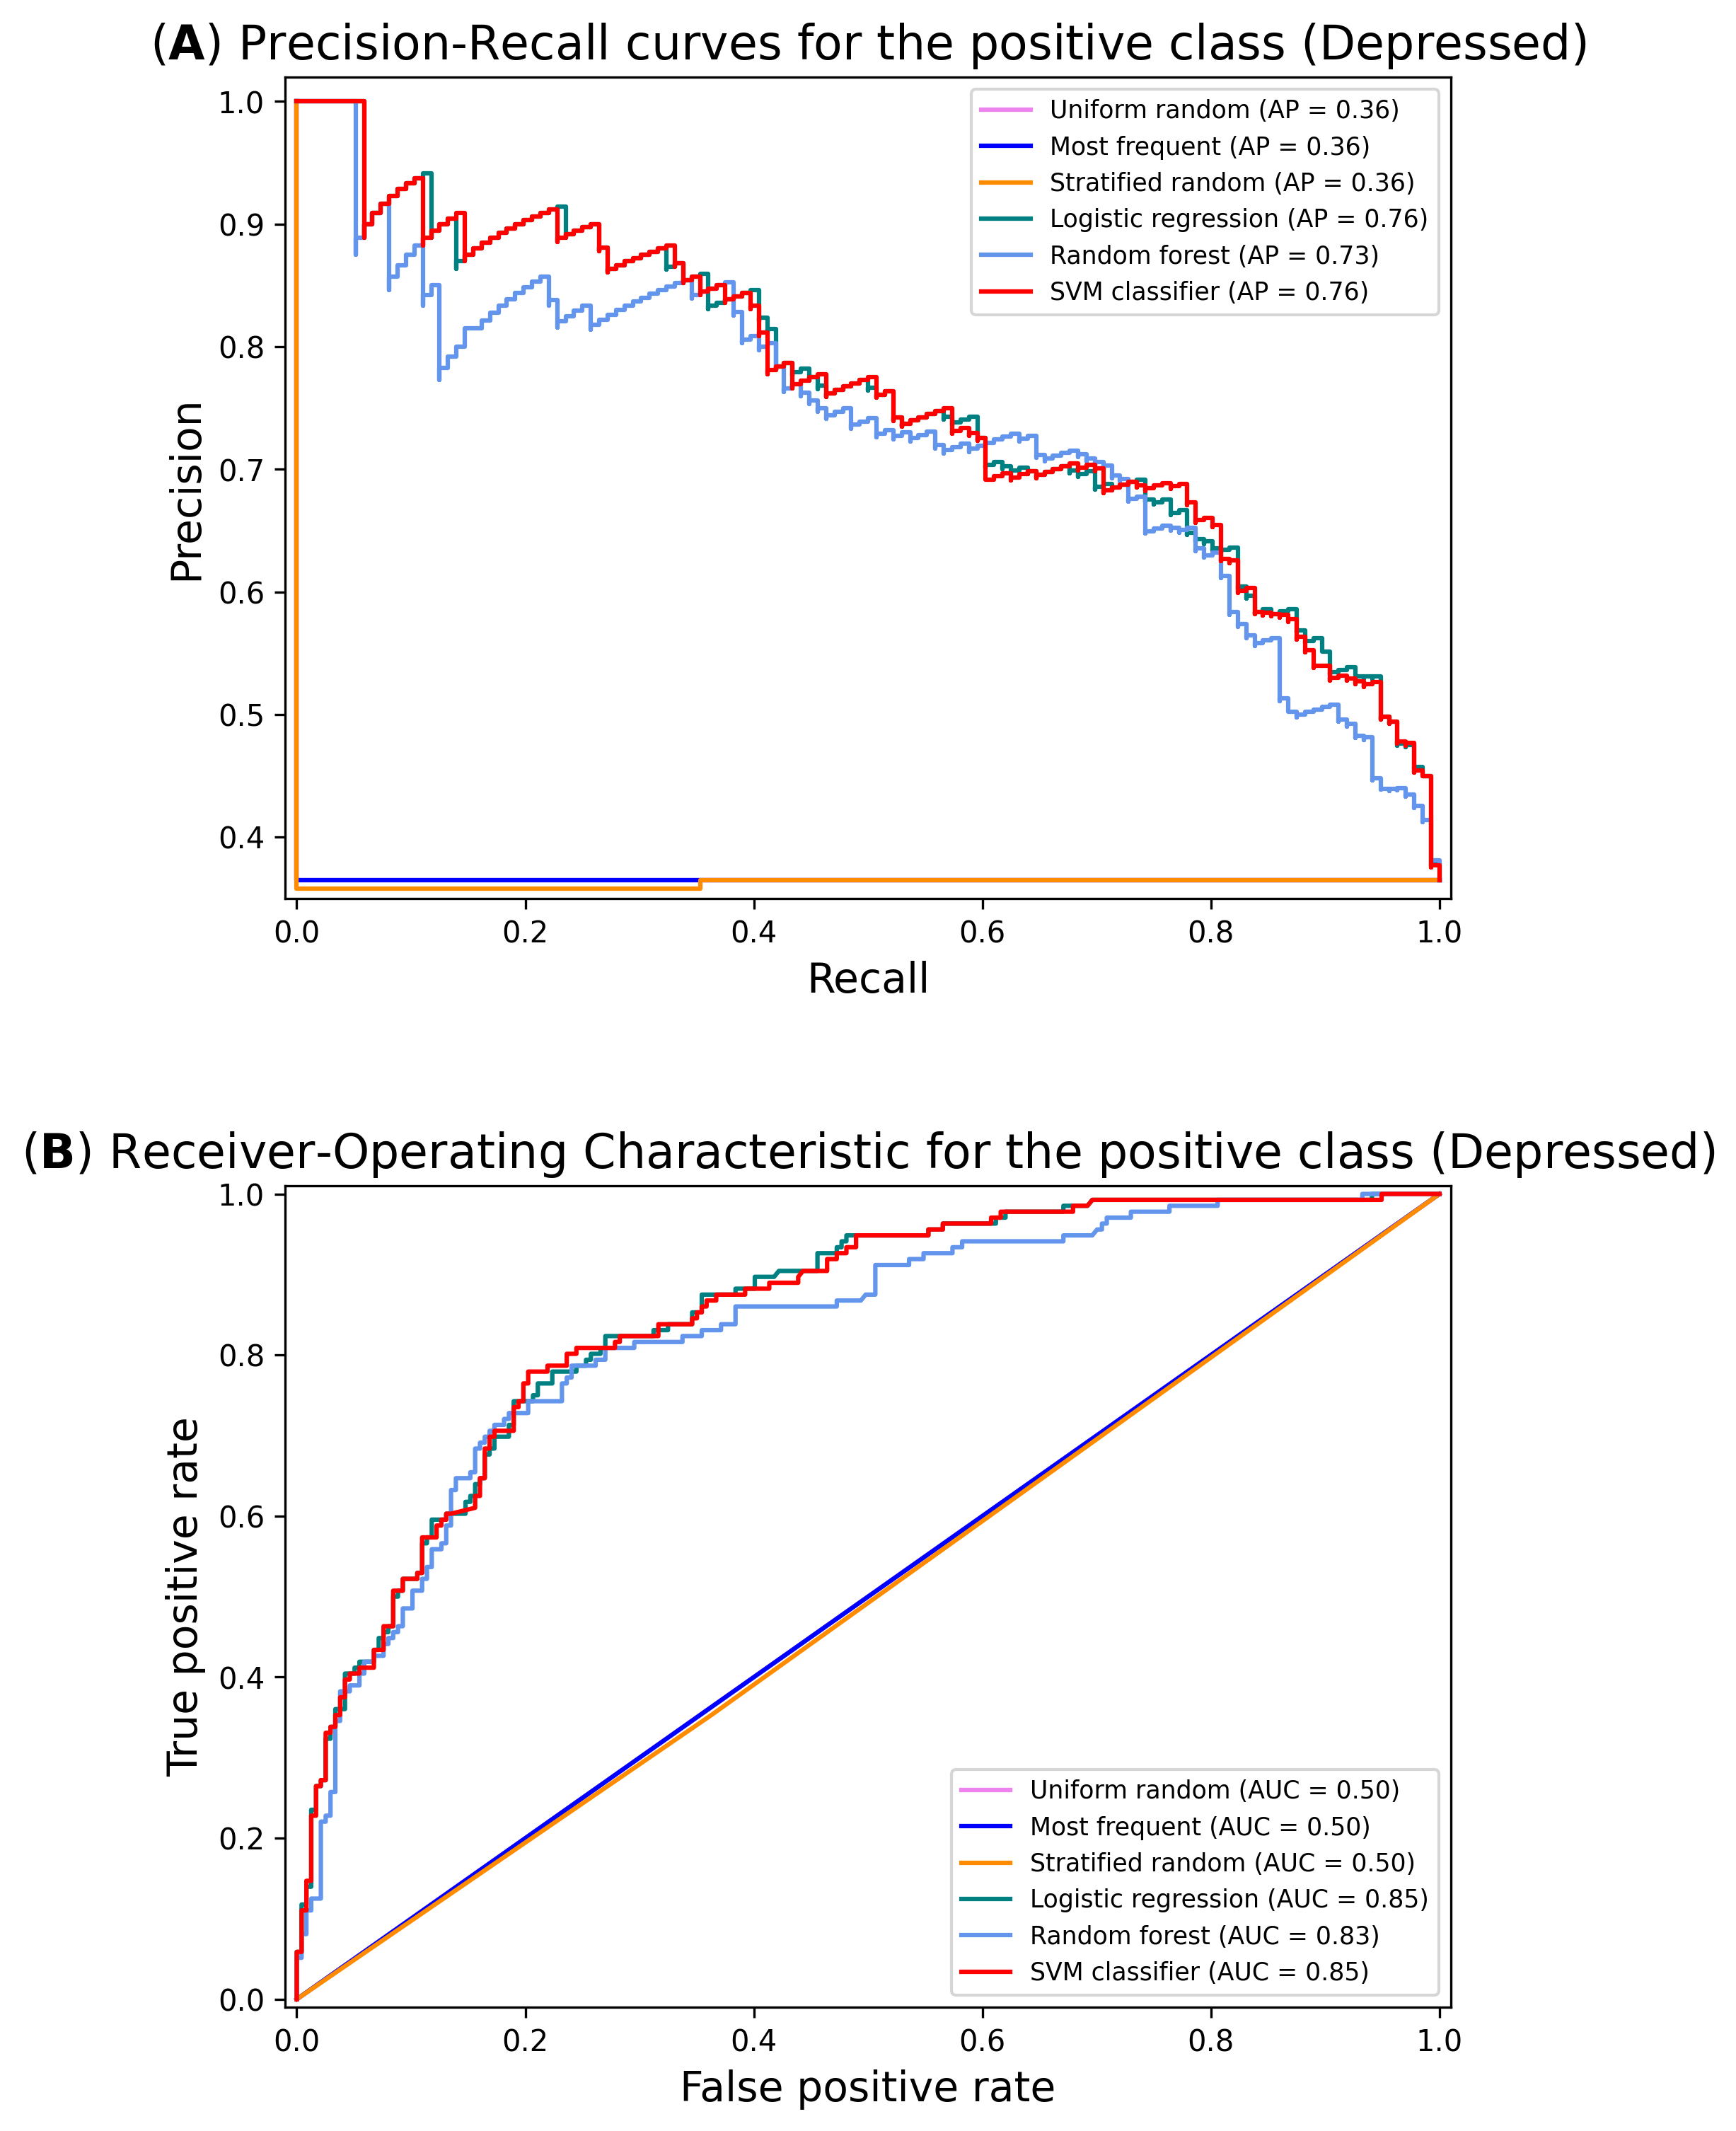

In [339]:
# fig2.savefig("your_path/fig2ab.jpg", pad_inches=0.1, bbox_inches="tight")

# fig2

About the plot above:
**It plots the AUPRC values fo reach model. However, in the legend it says "AP = ..." because of the Precision-Recall curve display in scikit-learn uses the term "average precision" (AP) to refer to the area under the precision-recall curve, and it is a standard term in this context.**

<br>

#### **Confusion Matrix**

**LOGISTIC REGRESSION CLASSIFIER**

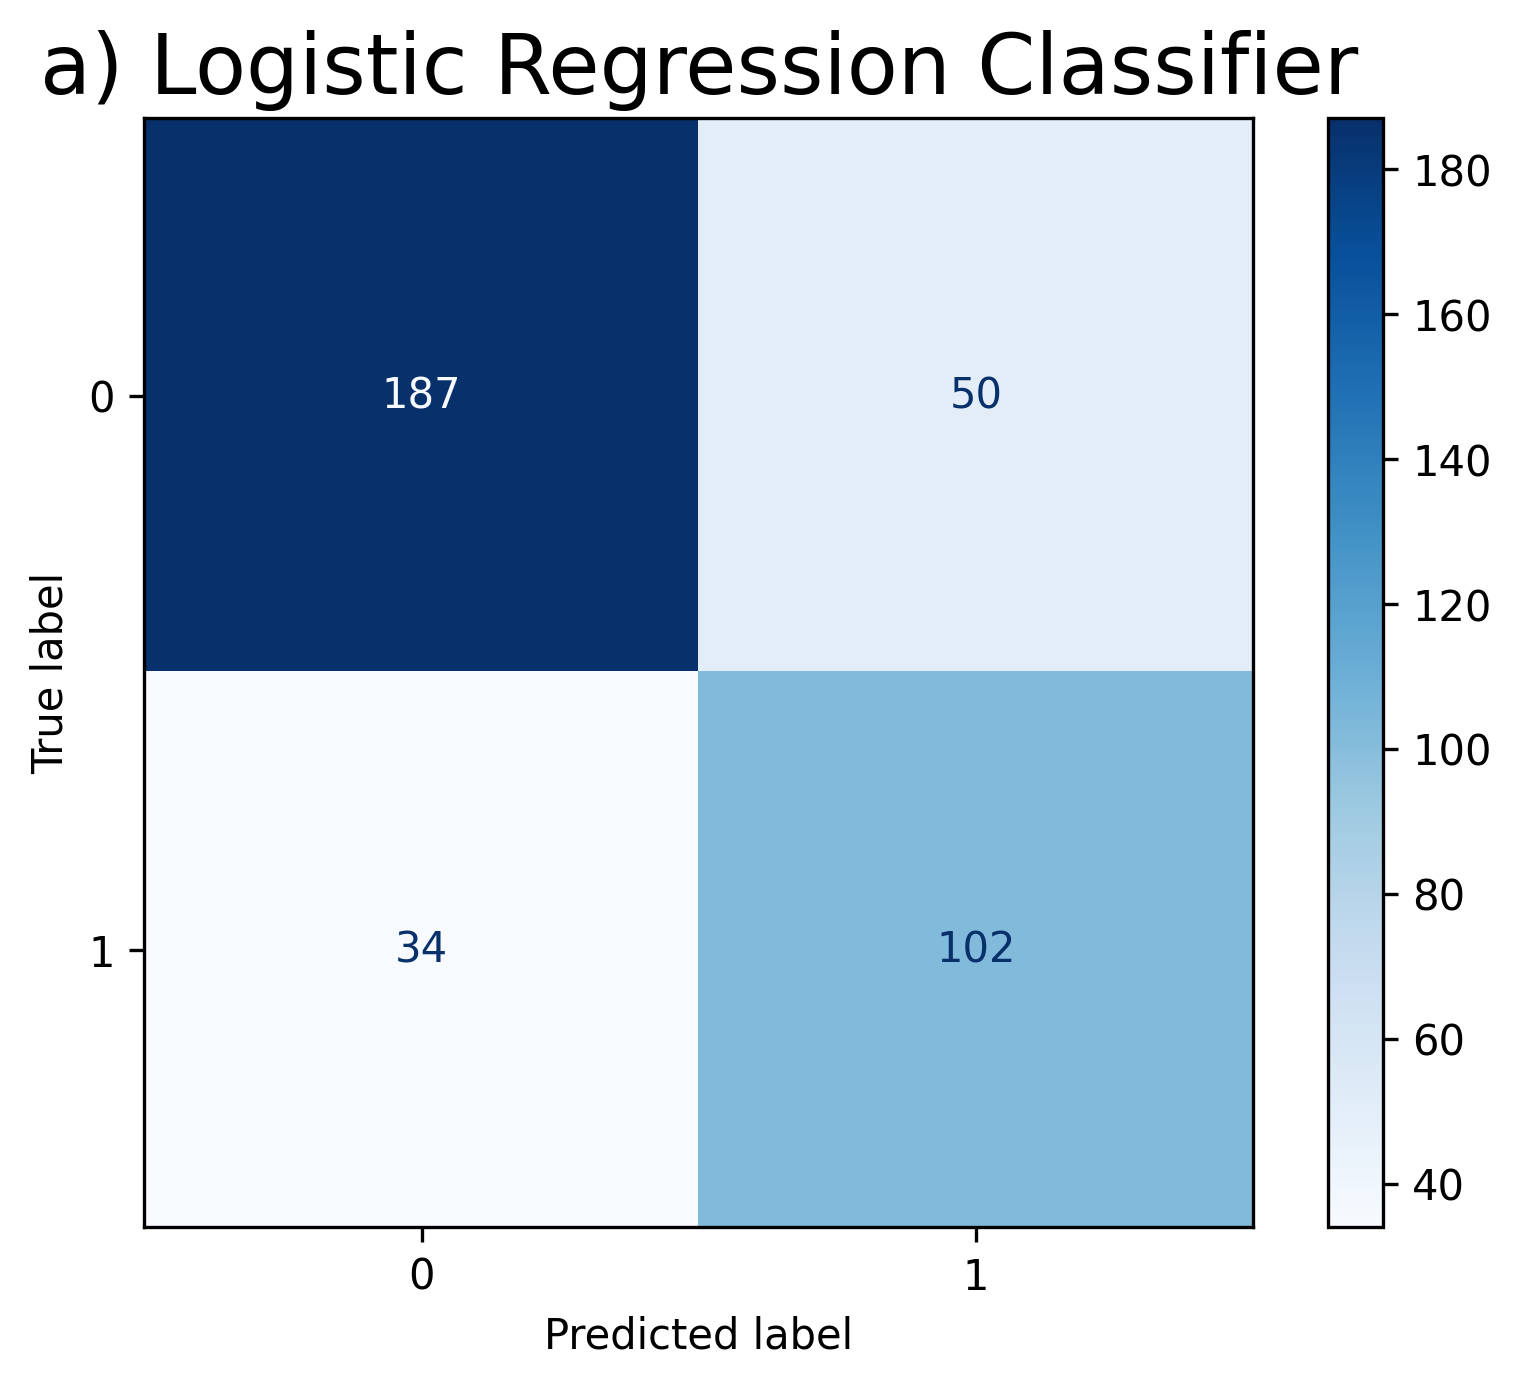

In [178]:
# CONFUSION MATRICES
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_LR_cm = LR_cl_train.predict(X_test) # LOGISTIC REGRESSION CLASSIFIER
cm_LR = confusion_matrix(y_test, y_pred_LR_cm)
cm_display = ConfusionMatrixDisplay(cm_LR).plot(cmap='Blues')
cm_display.ax_.set_title("a) Logistic Regression Classifier", fontsize=20);

# Save the figure as a jpg file
# plt.savefig("your_path/figS8a.jpg")

**RANDOM FOREST CLASSIFIER**

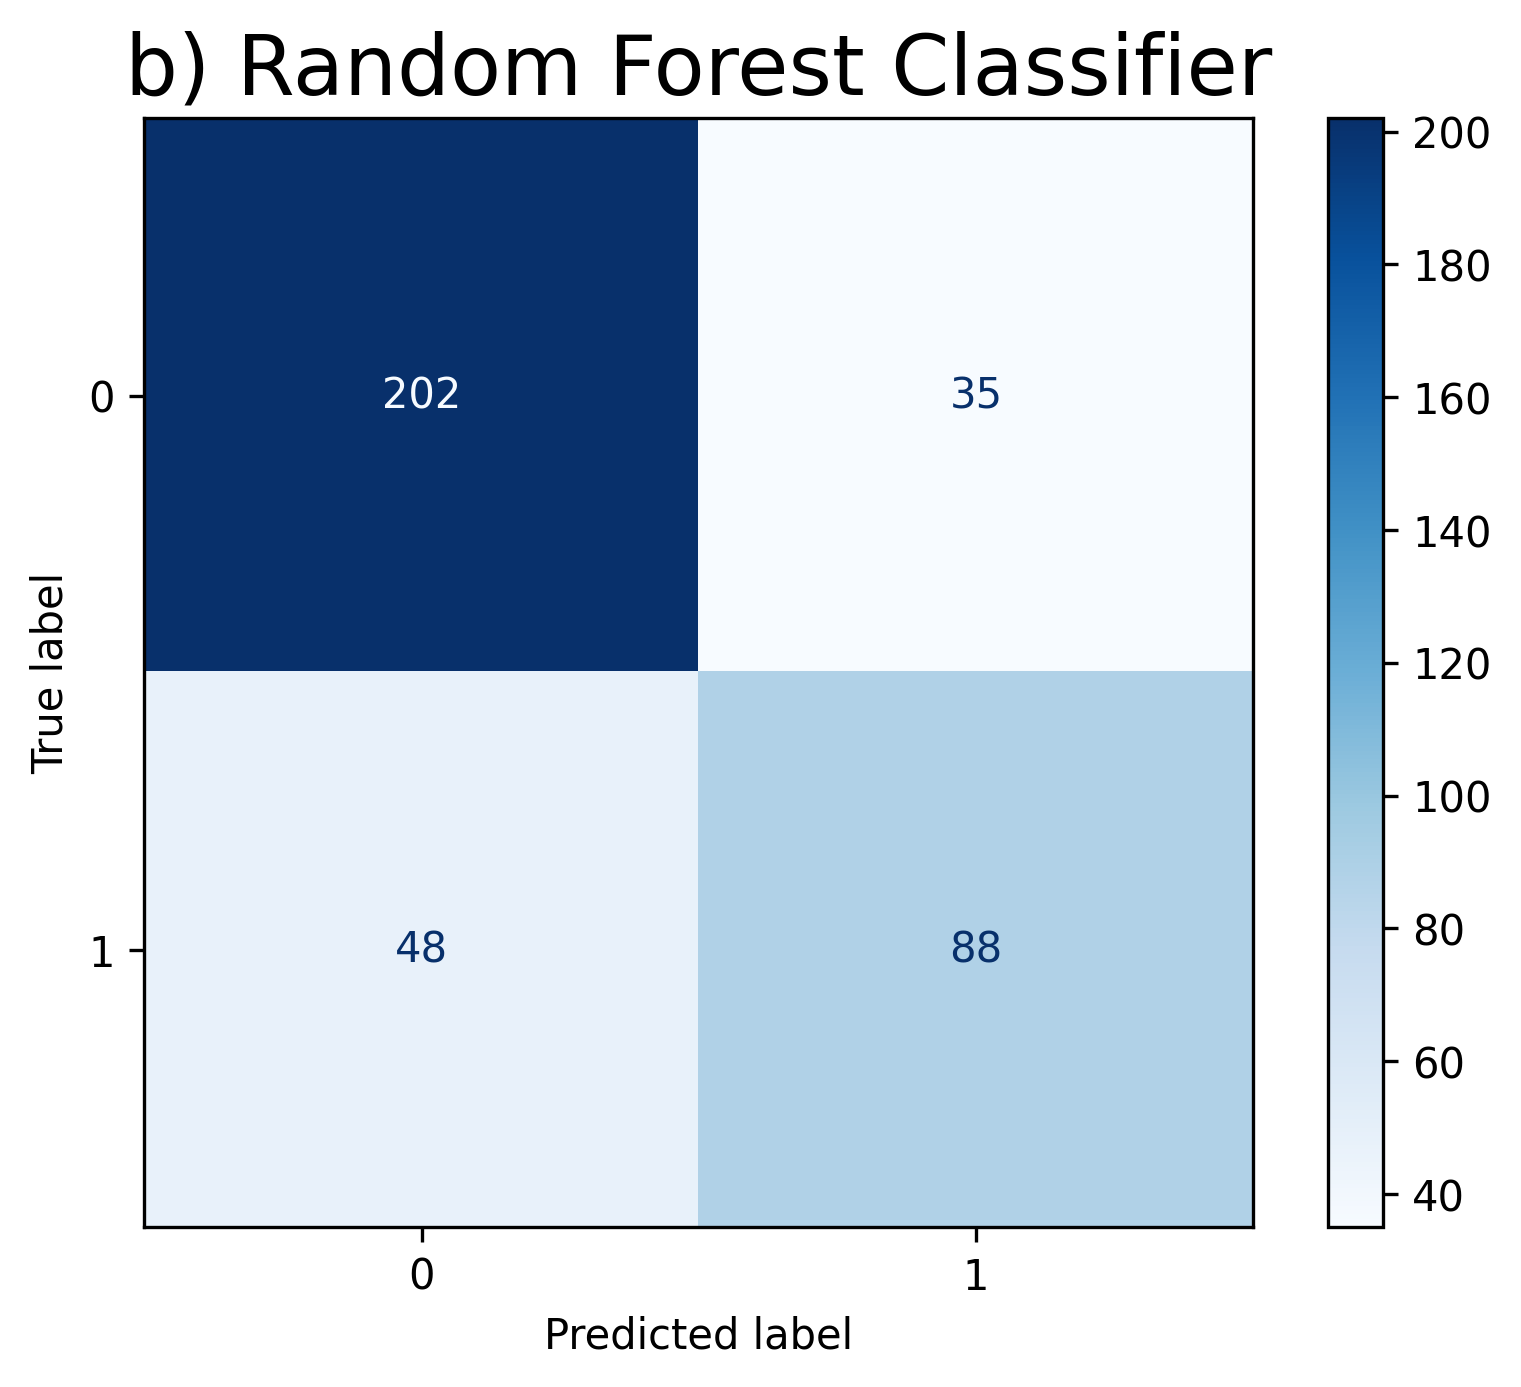

In [179]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_RF_cm = RF_cl_train.predict(X_test) # RANDOM FOREST CLASSIFIER
cm_RF = confusion_matrix(y_test, y_pred_RF_cm)
cm_display = ConfusionMatrixDisplay(cm_RF).plot(cmap='Blues')
cm_display.ax_.set_title("b) Random Forest Classifier",fontsize=20);

# Save the figure as a jpg file
# plt.savefig("your_path/figS8b.jpg")

**SVM CLASSIFIER**

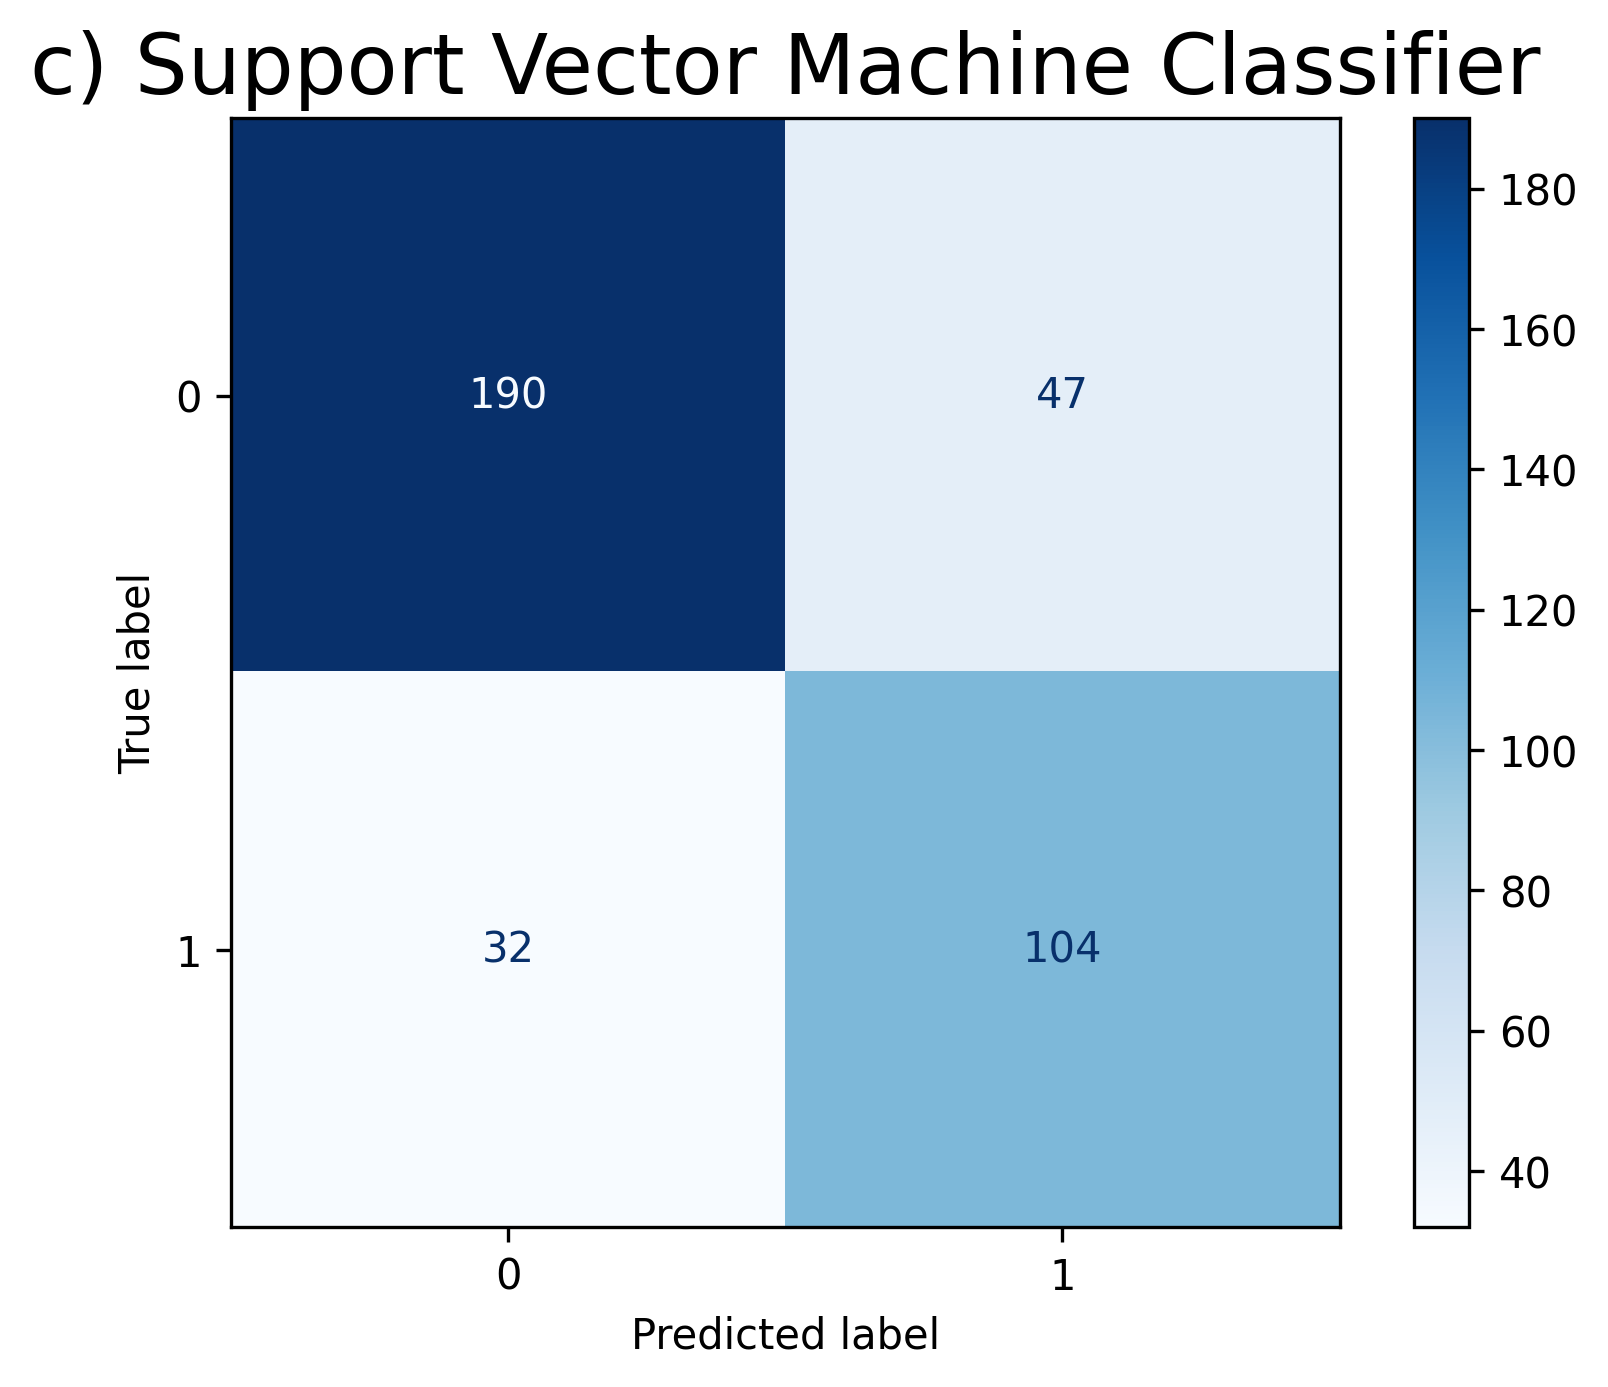

In [180]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_SVC_cm = SVM_cl_train.predict(X_test) # SVM CLASSIFIER
cm_SVC = confusion_matrix(y_test, y_pred_SVC_cm)
cm_display = ConfusionMatrixDisplay(cm_SVC).plot(cmap='Blues')
cm_display.ax_.set_title("c) Support Vector Machine Classifier",fontsize=20);

# Save the figure as a jpg file
# plt.savefig("your_path/figS8c.jpg")

### **Feature importance: Univariate analysis versus multivariate models**

In [394]:
# Load 'dataset.xlsx' file as pandas DataFrame to keep tabular format
import pandas as pd

# data = pd.read_excel("YOUR_PATH/dataset.xlsx", sheet_name=0, header=0)

In [395]:
# Assign negative and positive labels to 'BDEPRESSION' scores based on the specified cut-off and store them into a new variable 'BDEP_BINARY'

BDEP_BINARY = pd.cut(data.BDEPRESSION, bins=[0,20,63], labels=[0, 1], include_lowest=True) # [0, 20], (20, 63]

# Insert new column 'BDEP_BINARY' into the existing DataFrame 'data'
data.insert(0, 'BDEP_BINARY', BDEP_BINARY)

In [396]:
data

,BDEP_BINARY,participant,ADEPRESSION,BDEPRESSION,AANXIETY,BANXIETY,quarantinesubperiod,sex,age,mentdishist,suic
0,0,1,13,1,33,21,quar first,woman,22,no,no
1,0,2,16,11,21,14,quar first,woman,24,no,yes
2,0,3,5,11,20,23,quar first,woman,30,no,yes
3,1,4,28,24,41,41,quar first,woman,22,yes,yes
4,0,5,17,17,37,35,quar first,woman,25,no,yes
...,...,...,...,...,...,...,...,...,...,...,...
1487,0,1488,9,14,26,29,quar first,woman,29,yes,no
1488,1,1489,52,45,49,51,quar second,woman,18,yes,yes
1489,0,1490,25,19,40,36,quar third,woman,20,no,no
1490,1,1491,27,40,36,43,quar third,man,31,yes,yes


In [397]:
# Assign the target 'BDEP_BINARY' and each feature to separate variables
ADEPRESSION = data[['BDEP_BINARY', 'ADEPRESSION']]
AANXIETY = data[['BDEP_BINARY', 'AANXIETY']]
quarantinesubperiod = data[['BDEP_BINARY', 'quarantinesubperiod']]
sex = data[['BDEP_BINARY', 'sex']]
age = data[['BDEP_BINARY', 'age']]
mentdishist = data[['BDEP_BINARY', 'mentdishist']]
suic = data[['BDEP_BINARY', 'suic']]

In [398]:
# Convert categorical features into dummy variables
quarantinesubperiod = pd.get_dummies(quarantinesubperiod, columns=['quarantinesubperiod'])
sex = pd.get_dummies(sex, columns=['sex'])
mentdishist = pd.get_dummies(mentdishist, columns=['mentdishist'])
suic = pd.get_dummies(suic, columns=['suic'])

# Run the following lines to check if the conversion was executed correctly:
print("'quarantinesubperiod' columns:\n{}".format(list(quarantinesubperiod.columns)))
print("\n'sex' columns:\n{}".format(list(sex.columns)))
print("\n'mentdishist' columns:\n{}".format(list(mentdishist.columns)))
print("\n'suic' columns:\n{}".format(list(suic.columns)))

'quarantinesubperiod' columns:
['BDEP_BINARY', 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third']

'sex' columns:
['BDEP_BINARY', 'sex_man', 'sex_woman']

'mentdishist' columns:
['BDEP_BINARY', 'mentdishist_no', 'mentdishist_yes']

'suic' columns:
['BDEP_BINARY', 'suic_no', 'suic_yes']


In [399]:
print(quarantinesubperiod.dtypes)
print(sex.dtypes)
print(mentdishist.dtypes)
print(suic.dtypes)

BDEP_BINARY                        category
quarantinesubperiod_quar first         bool
quarantinesubperiod_quar second        bool
quarantinesubperiod_quar third         bool
dtype: object
BDEP_BINARY    category
sex_man            bool
sex_woman          bool
dtype: object
BDEP_BINARY        category
mentdishist_no         bool
mentdishist_yes        bool
dtype: object
BDEP_BINARY    category
suic_no            bool
suic_yes           bool
dtype: object


In [400]:
quarantinesubperiod = quarantinesubperiod.astype(int)
sex = sex.astype(int)
mentdishist = mentdishist.astype(int)
suic = suic.astype(int)
print(quarantinesubperiod.dtypes)
print(sex.dtypes)
print(mentdishist.dtypes)
print(suic.dtypes)

BDEP_BINARY                        int32
quarantinesubperiod_quar first     int32
quarantinesubperiod_quar second    int32
quarantinesubperiod_quar third     int32
dtype: object
BDEP_BINARY    int32
sex_man        int32
sex_woman      int32
dtype: object
BDEP_BINARY        int32
mentdishist_no     int32
mentdishist_yes    int32
dtype: object
BDEP_BINARY    int32
suic_no        int32
suic_yes       int32
dtype: object


In [401]:
# Convert DataFrames into NumPy arrays to make them compatible with scikit-learn functions
import numpy as np

ADEPRESSION = np.array(ADEPRESSION)
AANXIETY = np.array(AANXIETY)
quarantinesubperiod = np.array(quarantinesubperiod)
sex = np.array(sex)
age = np.array(age)
mentdishist = np.array(mentdishist)
suic = np.array(suic)

In [402]:
print(ADEPRESSION.dtype)
print(AANXIETY.dtype)
print(quarantinesubperiod.dtype)
print(sex.dtype)
print(mentdishist.dtype)
print(suic.dtype)

int64
int64
int32
int32
int32
int32


In [403]:
ADEPRESSION = ADEPRESSION.astype('int32')
AANXIETY = AANXIETY.astype('int32')

print(ADEPRESSION.dtype)
print(AANXIETY.dtype)
print(quarantinesubperiod.dtype)
print(sex.dtype)
print(mentdishist.dtype)
print(suic.dtype)

int32
int32
int32
int32
int32
int32


In [404]:
# Assign features to 'X' and target to 'y'
print("Shown below are the first five rows of each variable and their corresponding shape.")

# ADEPRESSION
ADEP_X = ADEPRESSION[:, 1:]
ADEP_y = ADEPRESSION[:, :1]

# Run the following lines to check 'ADEP_X' and 'ADEP_y':
print("\n'ADEP_X':\n", ADEP_X[0:5], ADEP_X.shape)
print("\n'ADEP_y':\n", ADEP_y[0:5], ADEP_y.shape)
##################################################

# AANXIETY
AANX_X = AANXIETY[:, 1:]
AANX_y = AANXIETY[:, :1]

# Run the following lines to check 'AANX_X' and 'AANX_y':
print("\n'AANX_X':\n", AANX_X[0:5], AANX_X.shape)
print("\n'AANX_y':\n", AANX_y[0:5], AANX_y.shape)
##################################################

# quarantinesubperiod
quar_X = quarantinesubperiod[:, 1:]
quar_y = quarantinesubperiod[:, :1]

# Run the following lines to check 'quar_X' and 'quar_y':
print("\n'quar_X':\n", quar_X[0:5], quar_X.shape)
print("\n'quar_y':\n", quar_y[0:5], quar_y.shape)
##################################################

# sex
sex_X = sex[:, 1:]
sex_y = sex[:, :1]

# Run the following lines to check 'sex_X' and 'sex_y':
print("\n'sex_X':\n", sex_X[0:5], sex_X.shape)
print("\n'sex_y':\n", sex_y[0:5], sex_y.shape)
##################################################

# age
age_X = age[:, 1:]
age_y = age[:, :1]

# Run the following lines to check 'age_X' and 'age_y':
print("\n'age_X':\n", age_X[0:5], age_X.shape)
print("\n'age_y':\n", age_y[0:5], age_y.shape)
##################################################

# mentdishist
ment_X = mentdishist[:, 1:]
ment_y = mentdishist[:, :1]

# Run the following lines to check 'ment_X' and 'ment_y':
print("\n'ment_X':\n", ment_X[0:5], ment_X.shape)
print("\n'ment_y':\n", ment_y[0:5], ment_y.shape)
##################################################

# suic
suic_X = suic[:, 1:]
suic_y = suic[:, :1]

# Run the following lines to check 'suic_X' and 'suic_y':
print("\n'suic_X':\n", suic_X[0:5], suic_X.shape)
print("\n'suic_y':\n", suic_y[0:5], suic_y.shape)

Shown below are the first five rows of each variable and their corresponding shape.

'ADEP_X':
 [[13]
 [16]
 [ 5]
 [28]
 [17]] (1492, 1)

'ADEP_y':
 [[0]
 [0]
 [0]
 [1]
 [0]] (1492, 1)

'AANX_X':
 [[33]
 [21]
 [20]
 [41]
 [37]] (1492, 1)

'AANX_y':
 [[0]
 [0]
 [0]
 [1]
 [0]] (1492, 1)

'quar_X':
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]] (1492, 3)

'quar_y':
 [[0]
 [0]
 [0]
 [1]
 [0]] (1492, 1)

'sex_X':
 [[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]] (1492, 2)

'sex_y':
 [[0]
 [0]
 [0]
 [1]
 [0]] (1492, 1)

'age_X':
 [[22]
 [24]
 [30]
 [22]
 [25]] (1492, 1)

'age_y':
 [[0]
 [0]
 [0]
 [1]
 [0]] (1492, 1)

'ment_X':
 [[1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]] (1492, 2)

'ment_y':
 [[0]
 [0]
 [0]
 [1]
 [0]] (1492, 1)

'suic_X':
 [[1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]] (1492, 2)

'suic_y':
 [[0]
 [0]
 [0]
 [1]
 [0]] (1492, 1)


In [405]:
# Split 'X' and 'y' into a training set and a test set

from sklearn.model_selection import train_test_split

# 'ADEPRESSION' feature
ADEP_X_train, ADEP_X_test, ADEP_y_train, ADEP_y_test = train_test_split(
    ADEP_X, ADEP_y,
    random_state=0,
    stratify=ADEP_y)

# Run the following lines to check training and test set dimensions:
print("'ADEPRESSION' training set - ", "features: {}; target: {}".format(ADEP_X_train.shape, ADEP_y_train.shape))
print("'ADEPRESSION' test set - ", "features: {}; target: {}".format(ADEP_X_test.shape, ADEP_y_test.shape))
####################################################################################################

# 'AANXIETY' feature
AANX_X_train, AANX_X_test, AANX_y_train, AANX_y_test = train_test_split(
    AANX_X, AANX_y,
    random_state=0,
    stratify=AANX_y)

# Run the following lines to check training and test set dimensions:
print("\n'AANXIETY' training set - ", "features: {}; target: {}".format(AANX_X_train.shape, AANX_y_train.shape))
print("'AANXIETY' test set - ", "features: {}; target: {}".format(AANX_X_test.shape, AANX_y_test.shape))
####################################################################################################

# 'quarantinesubperiod' feature
quar_X_train, quar_X_test, quar_y_train, quar_y_test = train_test_split(
    quar_X, quar_y,
    random_state=0,
    stratify=quar_y)

# Run the following lines to check training and test set dimensions:
print("\n'quarantinesubperiod' training set - ", "features: {}; target: {}".format(quar_X_train.shape, quar_y_train.shape))
print("'quarantinesubperiod' test set - ", "features: {}; target: {}".format(quar_X_test.shape, quar_y_test.shape))
####################################################################################################

# 'sex' feature
sex_X_train, sex_X_test, sex_y_train, sex_y_test = train_test_split(
    sex_X, sex_y,
    random_state=0,
    stratify=sex_y)

# Run the following lines to check training and test set dimensions:
print("\n'sex' training set - ", "features: {}; target: {}".format(sex_X_train.shape, sex_y_train.shape))
print("'sex' test set - ", "features: {}; target: {}".format(sex_X_test.shape, sex_y_test.shape))
####################################################################################################

# 'age' feature
age_X_train, age_X_test, age_y_train, age_y_test = train_test_split(
    age_X, age_y,
    random_state=0,
    stratify=age_y)

# Run the following lines to check training and test set dimensions:
print("\n'age' training set - ", "features: {}; target: {}".format(age_X_train.shape, age_y_train.shape))
print("'age' test set - ", "features: {}; target: {}".format(age_X_test.shape, age_y_test.shape))
####################################################################################################

# 'mentdishist' feature
ment_X_train, ment_X_test, ment_y_train, ment_y_test = train_test_split(
    ment_X, ment_y,
    random_state=0,
    stratify=ment_y)

# Run the following lines to check training and test set dimensions:
print("\n'mentdishist' training set - ", "features: {}; target: {}".format(ment_X_train.shape, ment_y_train.shape))
print("'mentdishist' test set - ", "features: {}; target: {}".format(ment_X_test.shape, ment_y_test.shape))
####################################################################################################

# 'suic' feature
suic_X_train, suic_X_test, suic_y_train, suic_y_test = train_test_split(
    suic_X, suic_y,
    random_state=0,
    stratify=suic_y)

# Run the following lines to check training and test set dimensions:
print("\n'suic' training set - ", "features: {}; target: {}".format(suic_X_train.shape, suic_y_train.shape))
print("'suic' test set - ", "features: {}; target: {}".format(suic_X_test.shape, suic_y_test.shape))

'ADEPRESSION' training set -  features: (1119, 1); target: (1119, 1)
'ADEPRESSION' test set -  features: (373, 1); target: (373, 1)

'AANXIETY' training set -  features: (1119, 1); target: (1119, 1)
'AANXIETY' test set -  features: (373, 1); target: (373, 1)

'quarantinesubperiod' training set -  features: (1119, 3); target: (1119, 1)
'quarantinesubperiod' test set -  features: (373, 3); target: (373, 1)

'sex' training set -  features: (1119, 2); target: (1119, 1)
'sex' test set -  features: (373, 2); target: (373, 1)

'age' training set -  features: (1119, 1); target: (1119, 1)
'age' test set -  features: (373, 1); target: (373, 1)

'mentdishist' training set -  features: (1119, 2); target: (1119, 1)
'mentdishist' test set -  features: (373, 2); target: (373, 1)

'suic' training set -  features: (1119, 2); target: (1119, 1)
'suic' test set -  features: (373, 2); target: (373, 1)


In [406]:
# Scale the features
print("Shown below are the first five rows of each variable and their corresponding shape.")

from sklearn.preprocessing import QuantileTransformer  # QuantileTransformer: Transform features using quantiles information.

# 'ADEPRESSION'
qt_norm = QuantileTransformer(output_distribution='normal').fit(ADEP_X_train)
ADEP_X_train = qt_norm.transform(ADEP_X_train)
ADEP_X_test = qt_norm.transform(ADEP_X_test)

# Run the following lines to check 'ADEP_X_train' and 'ADEP_X_test':
print("'ADEP_X_train':\n", ADEP_X_train[0:5], ADEP_X_train.shape)
print("\n'ADEP_X_test':\n", ADEP_X_test[0:5], ADEP_X_test.shape)
################################################################################

# 'AANXIETY'
qt_norm = QuantileTransformer(output_distribution='normal').fit(AANX_X_train)
AANX_X_train = qt_norm.transform(AANX_X_train)
AANX_X_test = qt_norm.transform(AANX_X_test)

# Run the following lines to check 'AANX_X_train' and 'AANX_X_test':
print("\n'AANX_X_train':\n", AANX_X_train[0:5], AANX_X_train.shape)
print("\n'AANX_X_test':\n", AANX_X_test[0:5], AANX_X_test.shape)
################################################################################

# 'age'
qt_norm = QuantileTransformer(output_distribution='normal').fit(age_X_train)
age_X_train = qt_norm.transform(age_X_train)
age_X_test = qt_norm.transform(age_X_test)

# Run the following lines to check 'age_X_train' and 'age_X_test':
print("\n'age_X_train':\n", age_X_train[0:5], age_X_train.shape)
print("\n'age_X_test':\n", age_X_test[0:5], age_X_test.shape)

Shown below are the first five rows of each variable and their corresponding shape.
'ADEP_X_train':
 [[-0.42111149]
 [ 1.03364682]
 [-1.50186053]
 [-0.13337869]
 [ 0.96742157]] (1119, 1)

'ADEP_X_test':
 [[-0.51779027]
 [-0.51779027]
 [-0.04894772]
 [-0.73315571]
 [ 0.14477961]] (373, 1)

'AANX_X_train':
 [[-0.1194676 ]
 [ 0.65182431]
 [-1.0819398 ]
 [-0.34415366]
 [ 1.61133325]] (1119, 1)

'AANX_X_test':
 [[-0.74800946]
 [-0.26008943]
 [ 0.953493  ]
 [-0.44314942]
 [-0.1194676 ]] (373, 1)

'age_X_train':
 [[-0.06905612]
 [-0.75466427]
 [-0.75466427]
 [ 0.75800423]
 [-1.17188995]] (1119, 1)

'age_X_test':
 [[ 0.23938016]
 [-1.17188995]
 [-1.17188995]
 [-0.06905612]
 [-0.41016941]] (373, 1)


#### Logistic regression classifier

In [407]:
# Obtain the univariate scores
ADEP_LR_score = []
AANX_LR_score = []
quar_LR_score = []
sex_LR_score = []
age_LR_score = []
ment_LR_score = []
suic_LR_score = []

# 'ADEPRESSION'
ADEP_LR = gs_LR_cl.best_estimator_.fit(ADEP_X_train, np.ravel(ADEP_y_train))

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_prob = ADEP_LR.predict_proba(ADEP_X_test_resampled)[:, 1] # probability estimates of the positive class
    ADEP_LR_score.append(average_precision_score(ADEP_y_test_resampled, ADEP_y_prob)) # average_precision_score(y_true, y_score)

# 'AANXIETY'
AANX_LR = gs_LR_cl.best_estimator_.fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_prob = AANX_LR.predict_proba(AANX_X_test_resampled)[:, 1] # probability estimates of the positive class
    AANX_LR_score.append(average_precision_score(AANX_y_test_resampled, AANX_y_prob)) # average_precision_score(y_true, y_score)

# 'quarantinesubperiod'
quar_LR = gs_LR_cl.best_estimator_.fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_prob = quar_LR.predict_proba(quar_X_test_resampled)[:, 1] # probability estimates of the positive class
    quar_LR_score.append(average_precision_score(quar_y_test_resampled, quar_y_prob)) # average_precision_score(y_true, y_score

# 'sex'
sex_LR = gs_LR_cl.best_estimator_.fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_prob = sex_LR.predict_proba(sex_X_test_resampled)[:, 1] # probability estimates of the positive class
    sex_LR_score.append(average_precision_score(sex_y_test_resampled, sex_y_prob)) # average_precision_score(y_true, y_score)

# 'age'
age_LR = gs_LR_cl.best_estimator_.fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_prob = age_LR.predict_proba(age_X_test_resampled)[:, 1] # probability estimates of the positive class
    age_LR_score.append(average_precision_score(age_y_test_resampled, age_y_prob)) # average_precision_score(y_true, y_score)

# 'mentdishist'
ment_LR = gs_LR_cl.best_estimator_.fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_prob = ment_LR.predict_proba(ment_X_test_resampled)[:, 1] # probability estimates of the positive class
    ment_LR_score.append(average_precision_score(ment_y_test_resampled, ment_y_prob)) # average_precision_score(y_true, y_score)

# 'suic'
suic_LR = gs_LR_cl.best_estimator_.fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_prob = suic_LR.predict_proba(suic_X_test_resampled)[:, 1] # probability estimates of the positive class
    suic_LR_score.append(average_precision_score(suic_y_test_resampled, suic_y_prob)) # average_precision_score(y_true, y_score)

print("Mean univariate scores for logistic regression classifier with 95% confidence intervals:")
print("    'ADEPRESSION' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_LR_score), np.percentile(ADEP_LR_score, 2.5), np.percentile(ADEP_LR_score, 97.5)))
print("    'AANXIETY' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_LR_score), np.percentile(AANX_LR_score, 2.5), np.percentile(AANX_LR_score, 97.5)))
print("    'quarantinesubperiod' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_LR_score), np.percentile(quar_LR_score, 2.5), np.percentile(quar_LR_score, 97.5)))
print("    'sex' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_LR_score), np.percentile(sex_LR_score, 2.5), np.percentile(sex_LR_score, 97.5)))
print("    'age' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_LR_score), np.percentile(age_LR_score, 2.5), np.percentile(age_LR_score, 97.5)))
print("    'mentdishist' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_LR_score), np.percentile(ment_LR_score, 2.5), np.percentile(ment_LR_score, 97.5)))
print("    'suic' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_LR_score), np.percentile(suic_LR_score, 2.5), np.percentile(suic_LR_score, 97.5)))

Mean univariate scores for logistic regression classifier with 95% confidence intervals:
    'ADEPRESSION' average precision score: 0.72 [0.64, 0.79]
    'AANXIETY' average precision score: 0.71 [0.64, 0.78]
    'quarantinesubperiod' average precision score: 0.37 [0.33, 0.42]
    'sex' average precision score: 0.38 [0.34, 0.42]
    'age' average precision score: 0.43 [0.37, 0.50]
    'mentdishist' average precision score: 0.46 [0.40, 0.52]
    'suic' average precision score: 0.46 [0.39, 0.52]


In [408]:
# Prepare the inputs for the plot
scores = [auprc_LR_cl_test, ADEP_LR_score, AANX_LR_score, quar_LR_score, sex_LR_score, age_LR_score, ment_LR_score, suic_LR_score]
models = ['All', 'DEP', 'ANX', 'SUBP', 'Sex', 'Age', 'MDH', 'SH']

mean_scores = []
ci_lower = []
ci_upper = []

for i in scores:
    mean_scores.append(np.mean(i))
    ci_lower.append(np.percentile(i, 2.5))
    ci_upper.append(np.percentile(i, 97.5))

ci_lower = [ci_lower]
ci_upper = [ci_upper]

ci_lower = np.array(mean_scores) - np.array(ci_lower)
ci_upper =np.array(ci_upper) - np.array(mean_scores)

ci = np.append(ci_lower, ci_upper, axis=0)

In [409]:
# Check that the mean univariate scores are correct 
mean_scores

[0.7611071157013503,
 0.7207432625501738,
 0.7068109145944388,
 0.3749958908835058,
 0.37796519293671355,
 0.4295929271563051,
 0.46115720537872895,
 0.458874710190379]

In [410]:
fig4 = plt.figure(layout='tight', figsize=(30*cm, 18*cm))
gs4 = fig4.add_gridspec(2, 2, **{"wspace":  0.2, "hspace": 0.3})

<Figure size 3543.31x2125.98 with 0 Axes>

In [411]:
import matplotlib.pyplot as plt

# Generate the plot
ax4a = fig4.add_subplot(gs4[0, 0])

# Plot bars with error bars
ax4a.bar(models, mean_scores, yerr=ci, capsize=5, alpha=0.7, label='Mean AUPRC', color='blue')

# Add a grid for better readability
ax4a.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the title and axis labels
ax4a.set_title('($\\bf{A}$) Logistic Regression Classifier', size=14)
# plt.xlabel('Multivariate and univariate models', size=18, labelpad=10.0)
ax4a.set_ylabel('Mean AUPRC scores', size=14)

# Rotate x-axis labels for better visibility
xlabels = ax4a.get_xticklabels()
xticks = ax4a.get_xticks()
_ = ax4a.set_xticks(xticks, xlabels, rotation=45, ha='right', rotation_mode='anchor')

#### Random forest classifier

In [412]:
# Obtain the univariate scores
ADEP_RF_score = []
AANX_RF_score = []
quar_RF_score = []
sex_RF_score = []
age_RF_score = []
ment_RF_score = []
suic_RF_score = []

# 'ADEPRESSION'
ADEP_RF = gs_RF_cl.best_estimator_.fit(ADEP_X_train, np.ravel(ADEP_y_train))

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_prob = ADEP_RF.predict_proba(ADEP_X_test_resampled)[:, 1] # probability estimates of the positive class
    ADEP_RF_score.append(average_precision_score(ADEP_y_test_resampled, ADEP_y_prob)) # average_precision_score(y_true, y_score)

# 'AANXIETY'
AANX_RF = gs_RF_cl.best_estimator_.fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_prob = AANX_RF.predict_proba(AANX_X_test_resampled)[:, 1] # probability estimates of the positive class
    AANX_RF_score.append(average_precision_score(AANX_y_test_resampled, AANX_y_prob)) # average_precision_score(y_true, y_score)

# 'quarantinesubperiod'
quar_RF = gs_RF_cl.best_estimator_.fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_prob = quar_RF.predict_proba(quar_X_test_resampled)[:, 1] # probability estimates of the positive class
    quar_RF_score.append(average_precision_score(quar_y_test_resampled, quar_y_prob)) # average_precision_score(y_true, y_score

# 'sex'
sex_RF = gs_RF_cl.best_estimator_.fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_prob = sex_RF.predict_proba(sex_X_test_resampled)[:, 1] # probability estimates of the positive class
    sex_RF_score.append(average_precision_score(sex_y_test_resampled, sex_y_prob)) # average_precision_score(y_true, y_score)

# 'age'
age_RF = gs_RF_cl.best_estimator_.fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_prob = age_RF.predict_proba(age_X_test_resampled)[:, 1] # probability estimates of the positive class
    age_RF_score.append(average_precision_score(age_y_test_resampled, age_y_prob)) # average_precision_score(y_true, y_score)

# 'mentdishist'
ment_RF = gs_RF_cl.best_estimator_.fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_prob = ment_RF.predict_proba(ment_X_test_resampled)[:, 1] # probability estimates of the positive class
    ment_RF_score.append(average_precision_score(ment_y_test_resampled, ment_y_prob)) # average_precision_score(y_true, y_score)

# 'suic'
suic_RF = gs_RF_cl.best_estimator_.fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_prob = suic_RF.predict_proba(suic_X_test_resampled)[:, 1] # probability estimates of the positive class
    suic_RF_score.append(average_precision_score(suic_y_test_resampled, suic_y_prob)) # average_precision_score(y_true, y_score)

print("Mean univariate scores for random forest classifier with 95% confidence intervals:")
print("    'ADEPRESSION' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_RF_score), np.percentile(ADEP_RF_score, 2.5), np.percentile(ADEP_RF_score, 97.5)))
print("    'AANXIETY' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_RF_score), np.percentile(AANX_RF_score, 2.5), np.percentile(AANX_RF_score, 97.5)))
print("    'quarantinesubperiod' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_RF_score), np.percentile(quar_RF_score, 2.5), np.percentile(quar_RF_score, 97.5)))
print("    'sex' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_RF_score), np.percentile(sex_RF_score, 2.5), np.percentile(sex_RF_score, 97.5)))
print("    'age' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_RF_score), np.percentile(age_RF_score, 2.5), np.percentile(age_RF_score, 97.5)))
print("    'mentdishist' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_RF_score), np.percentile(ment_RF_score, 2.5), np.percentile(ment_RF_score, 97.5)))
print("    'suic' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_RF_score), np.percentile(suic_RF_score, 2.5), np.percentile(suic_RF_score, 97.5)))

Mean univariate scores for random forest classifier with 95% confidence intervals:
    'ADEPRESSION' average precision score: 0.74 [0.68, 0.79]
    'AANXIETY' average precision score: 0.68 [0.60, 0.75]
    'quarantinesubperiod' average precision score: 0.37 [0.33, 0.42]
    'sex' average precision score: 0.38 [0.34, 0.42]
    'age' average precision score: 0.41 [0.35, 0.48]
    'mentdishist' average precision score: 0.46 [0.40, 0.52]
    'suic' average precision score: 0.46 [0.39, 0.52]


In [413]:
# Prepare the inputs for the plot
scores = [auprc_RF_cl_test, ADEP_RF_score, AANX_RF_score, quar_RF_score, sex_RF_score, age_RF_score, ment_RF_score, suic_RF_score]
models = ['All', 'DEP', 'ANX', 'SUBP', 'Sex', 'Age', 'MDH', 'SH']

mean_scores = []
ci_lower = []
ci_upper = []

for i in scores:
    mean_scores.append(np.mean(i))
    ci_lower.append(np.percentile(i, 2.5))
    ci_upper.append(np.percentile(i, 97.5))

ci_lower = [ci_lower]
ci_upper = [ci_upper]

ci_lower = np.array(mean_scores) - np.array(ci_lower)
ci_upper =np.array(ci_upper) - np.array(mean_scores)

ci = np.append(ci_lower, ci_upper, axis=0)

In [414]:
# Check that the mean univariate scores are correct 
mean_scores

[0.7341466912179587,
 0.7410379981800718,
 0.6808608933355158,
 0.3749958908835058,
 0.37796519293671355,
 0.40808459086103777,
 0.46115720537872895,
 0.458874710190379]

In [415]:
import matplotlib.pyplot as plt

# Generate the plot
ax4b = fig4.add_subplot(gs4[0, 1])

# Plot bars with error bars
ax4b.bar(models, mean_scores, yerr=ci, capsize=5, alpha=0.7, color='blue')

# Add a grid for better readability
ax4b.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the title and axis labels
ax4b.set_title('($\\bf{B}$) Random Forest Classifier', size=14)
# plt.xlabel('Multivariate and univariate models', size=18, labelpad=10.0)
ax4b.set_ylabel('Mean AUPRC scores', size=14)

# Rotate x-axis labels for better visibility
xlabels = ax4b.get_xticklabels()
xticks = ax4b.get_xticks()
_ = ax4b.set_xticks(xticks, xlabels, rotation=45, ha='right', rotation_mode='anchor')

#### SVM classifier

In [416]:
# Obtain the univariate scores
ADEP_SVC_score = []
AANX_SVC_score = []
quar_SVC_score = []
sex_SVC_score = []
age_SVC_score = []
ment_SVC_score = []
suic_SVC_score = []

# 'ADEPRESSION'
ADEP_SVC = gs_SVC_cl.best_estimator_.fit(ADEP_X_train, np.ravel(ADEP_y_train))

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_prob = ADEP_SVC.predict_proba(ADEP_X_test_resampled)[:, 1] # probability estimates of the positive class
    ADEP_SVC_score.append(average_precision_score(ADEP_y_test_resampled, ADEP_y_prob)) # average_precision_score(y_true, y_score)

# 'AANXIETY'
AANX_SVC = gs_SVC_cl.best_estimator_.fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_prob = AANX_SVC.predict_proba(AANX_X_test_resampled)[:, 1] # probability estimates of the positive class
    AANX_SVC_score.append(average_precision_score(AANX_y_test_resampled, AANX_y_prob)) # average_precision_score(y_true, y_score)

# 'quarantinesubperiod'
quar_SVC = gs_SVC_cl.best_estimator_.fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_prob = quar_SVC.predict_proba(quar_X_test_resampled)[:, 1] # probability estimates of the positive class
    quar_SVC_score.append(average_precision_score(quar_y_test_resampled, quar_y_prob)) # average_precision_score(y_true, y_score

# 'sex'
sex_SVC = gs_SVC_cl.best_estimator_.fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_prob = sex_SVC.predict_proba(sex_X_test_resampled)[:, 1] # probability estimates of the positive class
    sex_SVC_score.append(average_precision_score(sex_y_test_resampled, sex_y_prob)) # average_precision_score(y_true, y_score)

# 'age'
age_SVC = gs_SVC_cl.best_estimator_.fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_prob = age_SVC.predict_proba(age_X_test_resampled)[:, 1] # probability estimates of the positive class
    age_SVC_score.append(average_precision_score(age_y_test_resampled, age_y_prob)) # average_precision_score(y_true, y_score)

# 'mentdishist'
ment_SVC = gs_SVC_cl.best_estimator_.fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_prob = ment_SVC.predict_proba(ment_X_test_resampled)[:, 1] # probability estimates of the positive class
    ment_SVC_score.append(average_precision_score(ment_y_test_resampled, ment_y_prob)) # average_precision_score(y_true, y_score)

# 'suic'
suic_SVC = gs_SVC_cl.best_estimator_.fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_prob = suic_SVC.predict_proba(suic_X_test_resampled)[:, 1] # probability estimates of the positive class
    suic_SVC_score.append(average_precision_score(suic_y_test_resampled, suic_y_prob)) # average_precision_score(y_true, y_score)

print("Mean univariate scores for SVM classifier with 95% confidence intervals:")
print("    'ADEPRESSION' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_SVC_score), np.percentile(ADEP_SVC_score, 2.5), np.percentile(ADEP_SVC_score, 97.5)))
print("    'AANXIETY' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_SVC_score), np.percentile(AANX_SVC_score, 2.5), np.percentile(AANX_SVC_score, 97.5)))
print("    'quarantinesubperiod' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_SVC_score), np.percentile(quar_SVC_score, 2.5), np.percentile(quar_SVC_score, 97.5)))
print("    'sex' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_SVC_score), np.percentile(sex_SVC_score, 2.5), np.percentile(sex_SVC_score, 97.5)))
print("    'age' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_SVC_score), np.percentile(age_SVC_score, 2.5), np.percentile(age_SVC_score, 97.5)))
print("    'mentdishist' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_SVC_score), np.percentile(ment_SVC_score, 2.5), np.percentile(ment_SVC_score, 97.5)))
print("    'suic' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_SVC_score), np.percentile(suic_SVC_score, 2.5), np.percentile(suic_SVC_score, 97.5)))

Mean univariate scores for SVM classifier with 95% confidence intervals:
    'ADEPRESSION' average precision score: 0.72 [0.64, 0.79]
    'AANXIETY' average precision score: 0.71 [0.64, 0.78]
    'quarantinesubperiod' average precision score: 0.41 [0.35, 0.47]
    'sex' average precision score: 0.38 [0.34, 0.42]
    'age' average precision score: 0.43 [0.37, 0.50]
    'mentdishist' average precision score: 0.46 [0.40, 0.52]
    'suic' average precision score: 0.46 [0.39, 0.52]


In [417]:
# Prepare the inputs for the plot
scores = [auprc_SVC_cl_test, ADEP_SVC_score, AANX_SVC_score, quar_SVC_score, sex_SVC_score, age_SVC_score, ment_SVC_score, suic_SVC_score]
models = ['All', 'DEP', 'ANX', 'SUBP', 'Sex', 'Age', 'MDH', 'SH']

mean_scores = []
ci_lower = []
ci_upper = []

for i in scores:
    mean_scores.append(np.mean(i))
    ci_lower.append(np.percentile(i, 2.5))
    ci_upper.append(np.percentile(i, 97.5))

ci_lower = [ci_lower]
ci_upper = [ci_upper]

ci_lower = np.array(mean_scores) - np.array(ci_lower)
ci_upper =np.array(ci_upper) - np.array(mean_scores)

ci = np.append(ci_lower, ci_upper, axis=0)

In [418]:
# Check that the mean univariate scores are correct 
mean_scores

[0.7606162533382888,
 0.7207432625501738,
 0.7068109145944388,
 0.40564286625289886,
 0.37796519293671355,
 0.4295929271563051,
 0.46115720537872895,
 0.458874710190379]

In [419]:
import matplotlib.pyplot as plt

# Generate the plot
ax4c = fig4.add_subplot(gs4[1, 0])

# Plot bars with error bars
ax4c.bar(models, mean_scores, yerr=ci, capsize=5, alpha=0.7, color='blue')

# Add a grid for better readability
ax4c.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the title and axis labels
ax4c.set_title('($\\bf{C}$) Support Vector Machine Classifier', size=14)
ax4c.set_xlabel('Multivariate and univariate models', size=14, labelpad=10.0)
ax4c.set_ylabel('Mean AUPRC scores', size=14)

# Rotate x-axis labels for better visibility
# plt.xticks(rotation=45, ha='right')
xlabels = ax4c.get_xticklabels()
xticks = ax4c.get_xticks()
_ = ax4c.set_xticks(xticks, xlabels, rotation=45, ha='right', rotation_mode='anchor')

In [ ]:
# fig4.savefig("your_path/Fig4abc.jpg", pad_inches=0.1, bbox_inches="tight")

C:\Users\stein\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



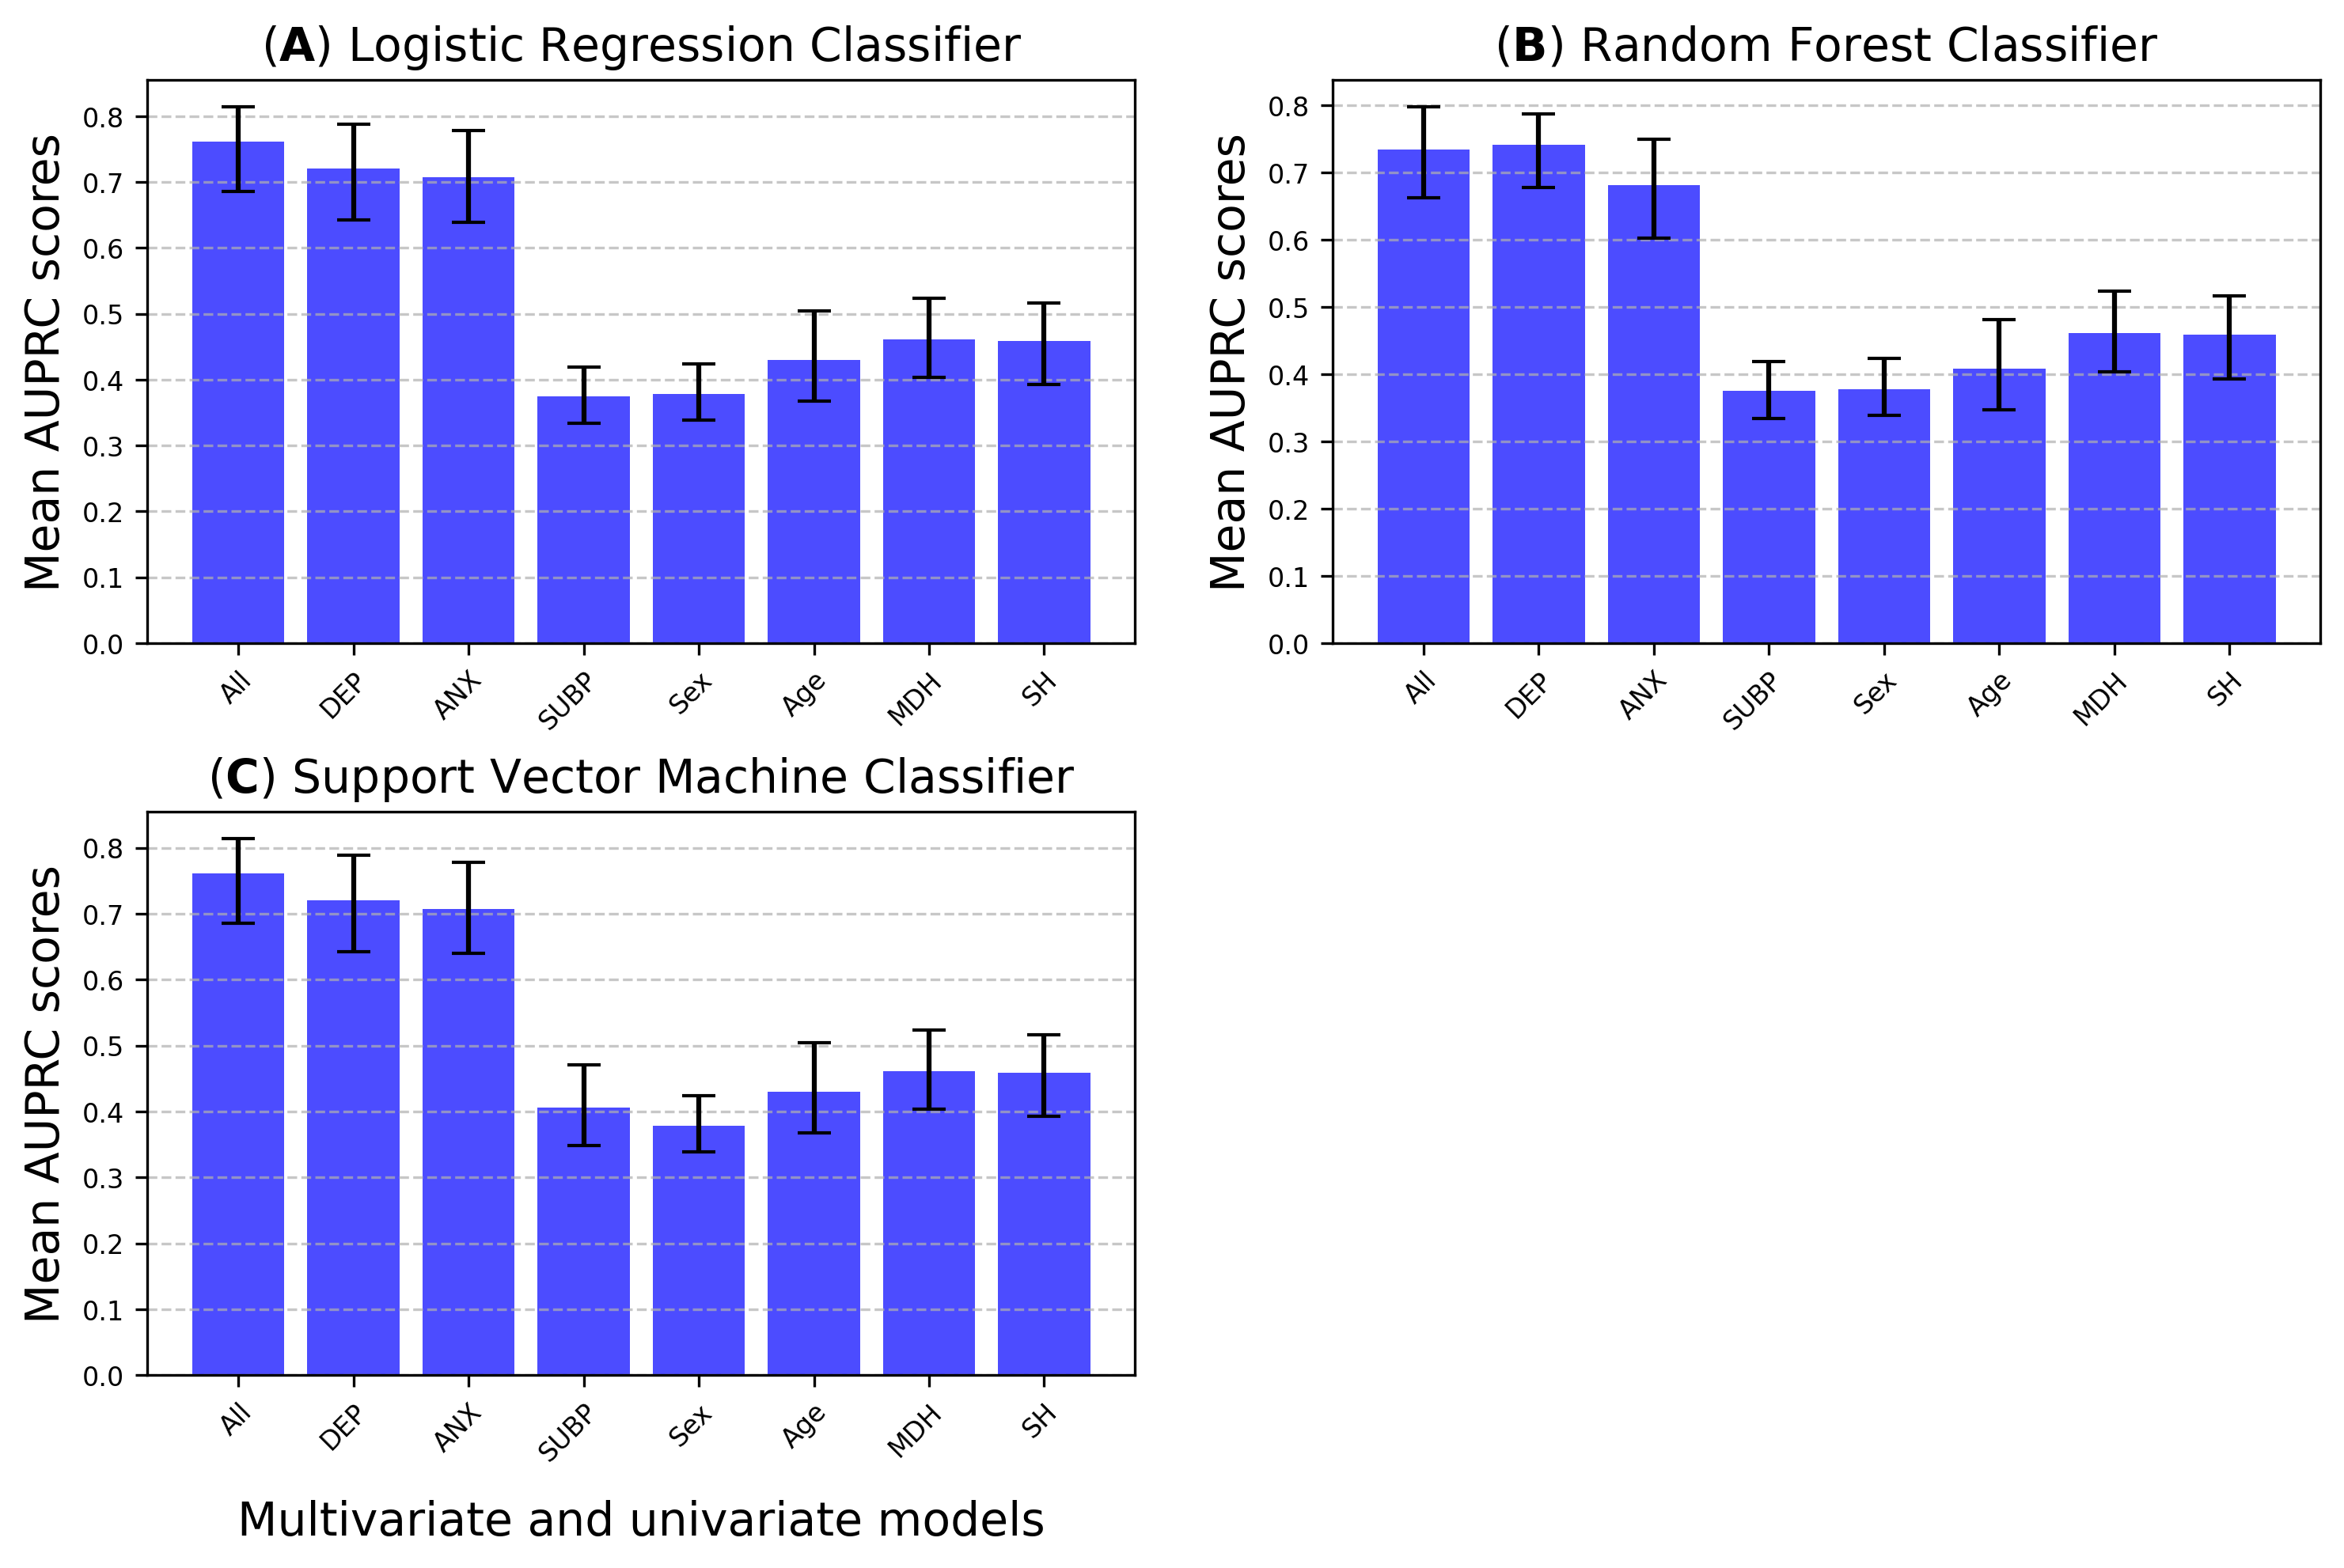

In [420]:
fig4